In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
df = pd.read_csv('../day3/완전크롤.csv')

📊 데이터 기본 정보
총 데이터 수: 1,162개
컬럼 수: 15개

컬럼 목록:
   1. year
   2. parsed_date
   3. date
   4. title
   5. author
   6. views
   7. text_content
   8. content_length
   9. has_images
  10. image_count
  11. image_urls
  12. image_details
  13. downloaded_images
  14. url
  15. page

데이터 타입:
year                   int64
parsed_date           object
date                  object
title                 object
author                object
views                  int64
text_content          object
content_length       float64
has_images            object
image_count          float64
image_urls            object
image_details         object
downloaded_images     object
url                   object
page                   int64
dtype: object

결측값 확인:
  text_content: 309개 (26.6%)
  content_length: 304개 (26.2%)
  image_urls: 304개 (26.2%)
  image_details: 304개 (26.2%)
  downloaded_images: 304개 (26.2%)

📈 기본 통계
평균 조회수: 4,405.3
조회수 중간값: 2,820
최대 조회수: 98,315
평균 글 길이: 750.7자

이미지 포함 게시물: 0개 (0.0%)

📅 연도별 게

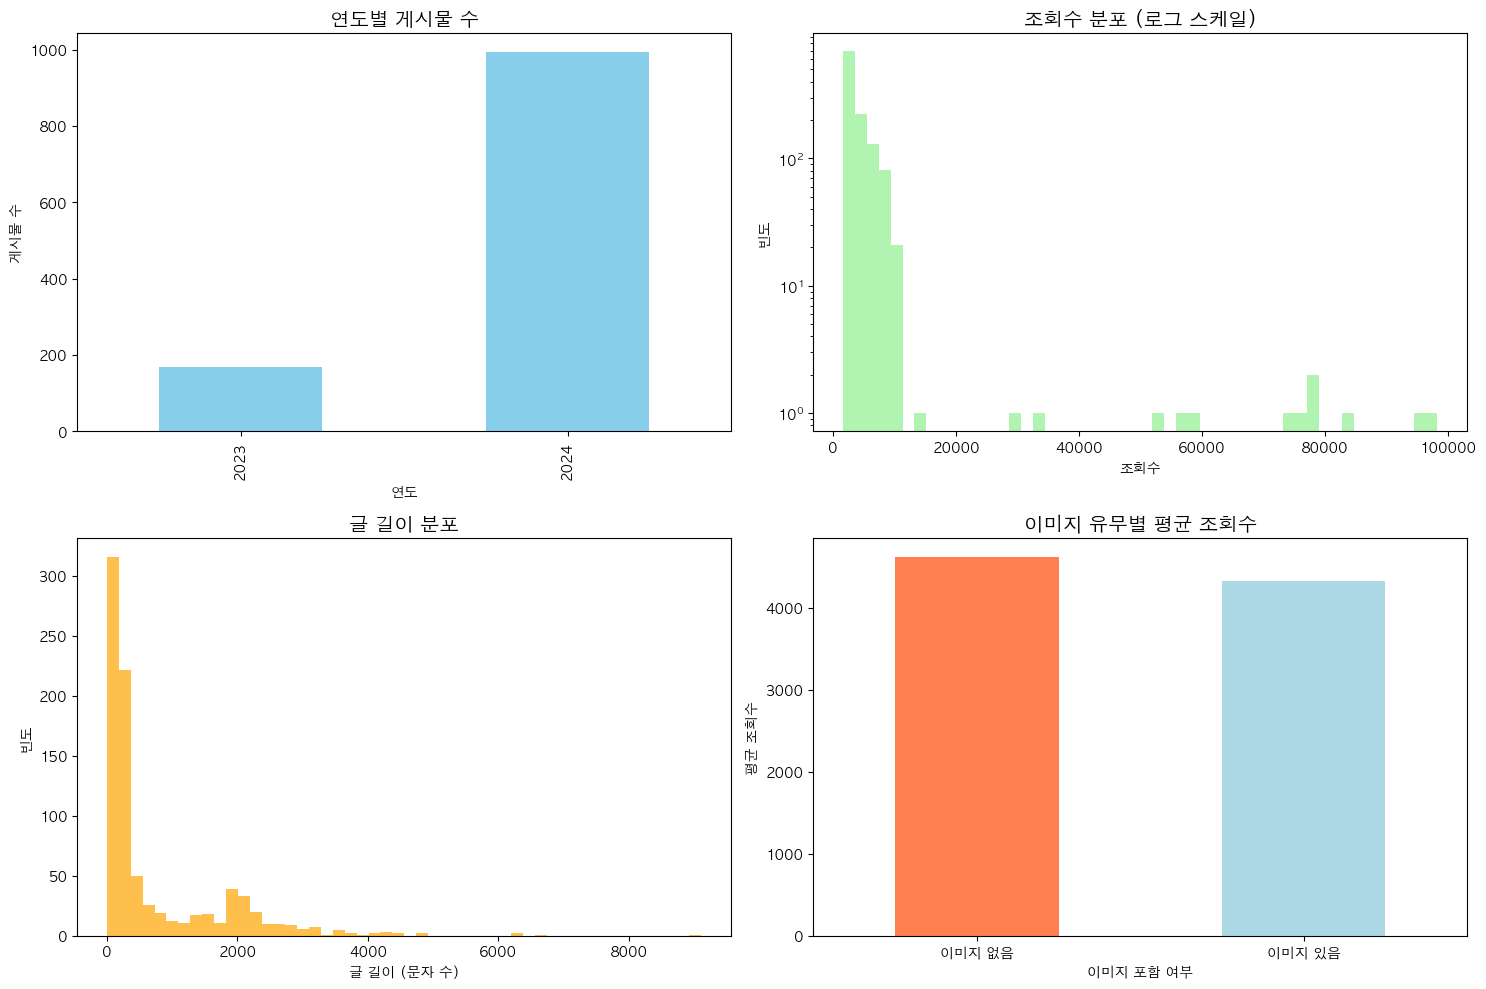


✅ Step 1 완료: 데이터 로딩 및 기본 분석
다음 단계: Step 2 - 광고 게시물 제거


In [2]:
# Step 1: 데이터 로딩 및 기본 분석
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Mac 환경에서 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
csv_path = "../day3/완전크롤.csv"
df = pd.read_csv(csv_path, encoding='utf-8')

print("=" * 60)
print("📊 데이터 기본 정보")
print("=" * 60)

print(f"총 데이터 수: {len(df):,}개")
print(f"컬럼 수: {len(df.columns)}개")
print(f"\n컬럼 목록:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\n데이터 타입:")
print(df.dtypes)

print(f"\n결측값 확인:")
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
if len(missing_data) > 0:
    for col, missing in missing_data.items():
        print(f"  {col}: {missing:,}개 ({missing/len(df)*100:.1f}%)")
else:
    print("  결측값 없음")

# 기본 통계
print(f"\n📈 기본 통계")
print("=" * 60)
print(f"평균 조회수: {df['views'].mean():,.1f}")
print(f"조회수 중간값: {df['views'].median():,.0f}")
print(f"최대 조회수: {df['views'].max():,}")
print(f"평균 글 길이: {df['content_length'].mean():.1f}자")

# 이미지 관련 통계
image_posts = df[df['has_images'] == True]
print(f"\n이미지 포함 게시물: {len(image_posts):,}개 ({len(image_posts)/len(df)*100:.1f}%)")

if len(image_posts) > 0:
    print(f"평균 이미지 수: {image_posts['image_count'].mean():.1f}개")
    print(f"최대 이미지 수: {image_posts['image_count'].max():.0f}개")

# 연도별 분포
print(f"\n📅 연도별 게시물 분포")
print("=" * 60)
yearly_counts = df['year'].value_counts().sort_index()
for year, count in yearly_counts.items():
    print(f"{year}년: {count:,}개 ({count/len(df)*100:.1f}%)")

# 데이터 샘플 확인
print(f"\n📋 데이터 샘플 (첫 3개)")
print("=" * 60)
for i in range(min(3, len(df))):
    print(f"\n[게시물 {i+1}]")
    print(f"제목: {df.iloc[i]['title'][:50]}...")
    print(f"작성자: {df.iloc[i]['author']}")
    print(f"조회수: {df.iloc[i]['views']:,}")
    print(f"날짜: {df.iloc[i]['date']}")
    print(f"이미지 여부: {df.iloc[i]['has_images']}")
    if pd.notna(df.iloc[i]['text_content']):
        content_preview = str(df.iloc[i]['text_content'])[:100].replace('\n', ' ')
        print(f"내용 미리보기: {content_preview}...")

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 연도별 게시물 수
yearly_counts.plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('연도별 게시물 수', fontsize=14)
axes[0,0].set_xlabel('연도')
axes[0,0].set_ylabel('게시물 수')

# 2. 조회수 분포 (로그 스케일)
axes[0,1].hist(df['views'], bins=50, alpha=0.7, color='lightgreen')
axes[0,1].set_yscale('log')
axes[0,1].set_title('조회수 분포 (로그 스케일)', fontsize=14)
axes[0,1].set_xlabel('조회수')
axes[0,1].set_ylabel('빈도')

# 3. 글 길이 분포
axes[1,0].hist(df['content_length'].dropna(), bins=50, alpha=0.7, color='orange')
axes[1,0].set_title('글 길이 분포', fontsize=14)
axes[1,0].set_xlabel('글 길이 (문자 수)')
axes[1,0].set_ylabel('빈도')

# 4. 이미지 유무별 조회수 비교
image_comparison = df.groupby('has_images')['views'].mean()
image_comparison.plot(kind='bar', ax=axes[1,1], color=['coral', 'lightblue'])
axes[1,1].set_title('이미지 유무별 평균 조회수', fontsize=14)
axes[1,1].set_xlabel('이미지 포함 여부')
axes[1,1].set_ylabel('평균 조회수')
axes[1,1].set_xticklabels(['이미지 없음', '이미지 있음'], rotation=0)

plt.tight_layout()
plt.show()

print(f"\n✅ Step 1 완료: 데이터 로딩 및 기본 분석")
print(f"다음 단계: Step 2 - 광고 게시물 제거")

🚫 정교한 광고 게시물 제거 (수정 버전)
원본 데이터: 1,162개

🎯 명확한 광고 패턴 필터링...
제목 광고 키워드: 14개
전화번호 포함: 95개
과도한 블로그 링크: 44개
중복 내용: 22개
내용 결측: 309개
극도로 짧은 내용 (<10자): 0개

🎯 보수적 필터링 결과: 448개

✅ 보수적 광고 제거 결과:
  원본 게시물: 1,162개
  제거된 게시물: 448개 (38.6%)
  남은 게시물: 714개 (61.4%)

🔍 URL 패턴 상세 분석:
URL 포함 게시물: 683개
2개 이상 URL: 303개
5개 이상 URL: 77개


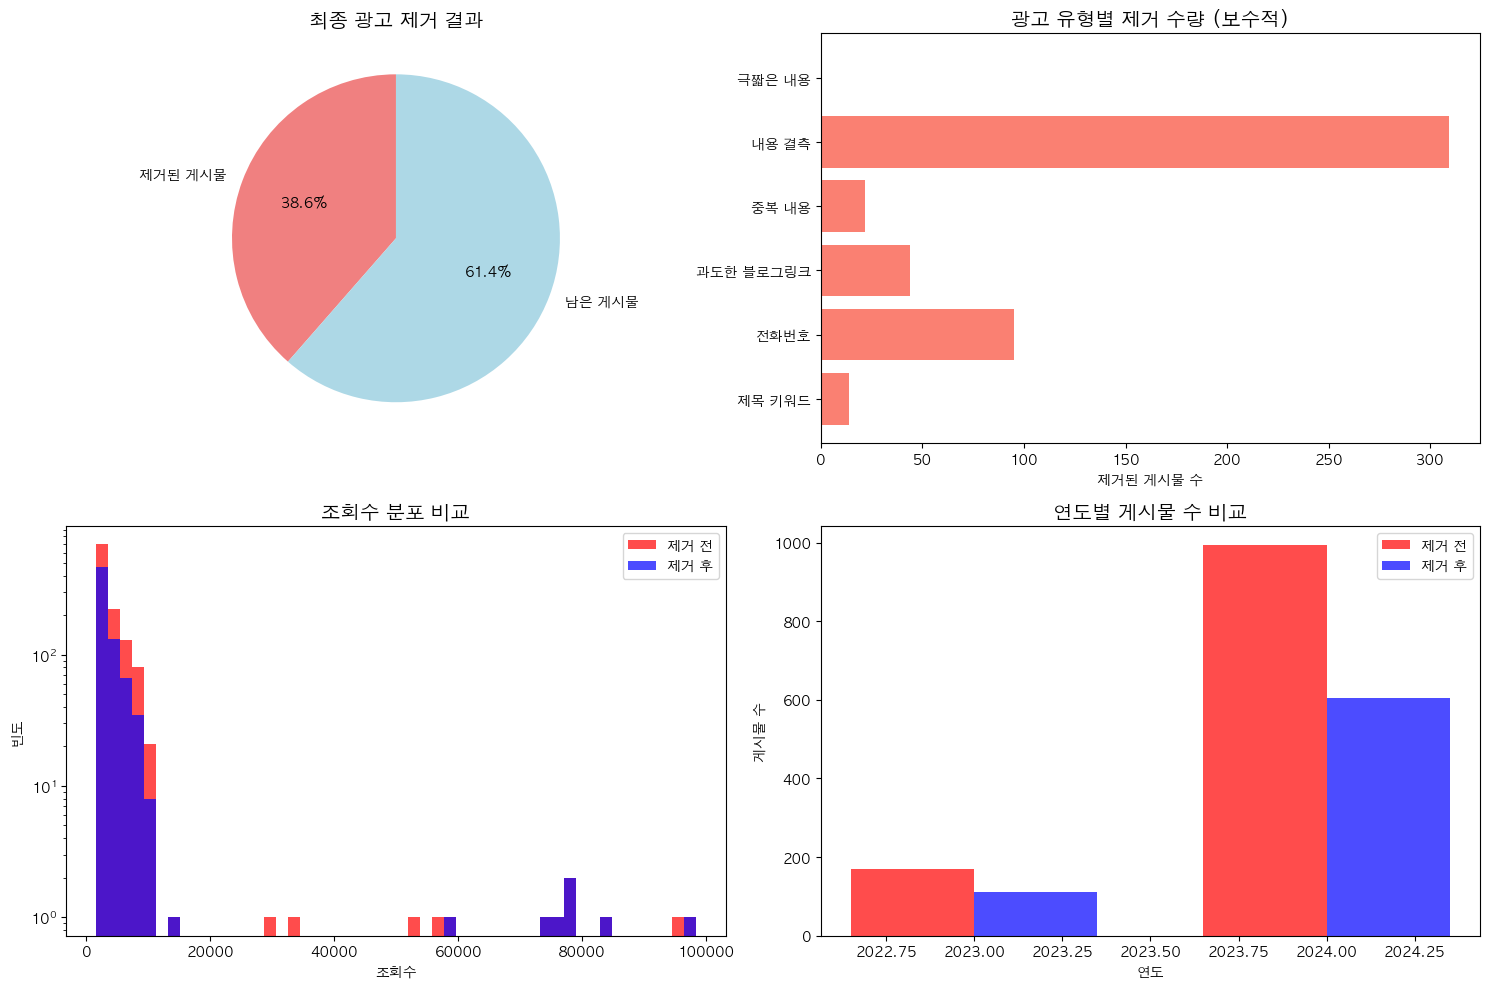


📋 남은 게시물 샘플 (정상 게시물):

[정상 게시물 1]
제목: 25년 대구 안정적인 회복세 예상 지방 상저하고흐름 대구대장 범어자이르네 입지 가치...
조회수: 2,024
내용: 25년 대구 안정적인 회복세 예상 지방 상저하고흐름 대구대장 범어자이르네 입지 가치 대구 범어자이르네 입지 가치 대구 내 최고급 주거지로서의 입지 대구는 뒤따라 안정적인 회복세를 보일 것... blog.naver.com...

[정상 게시물 2]
제목: 대구시 월세...
조회수: 2,024
내용: ·승계조합원 취득세 납부고지서 받으셨나요? 대응방법 알려드립니다. https://kangnp.com/kr 대구나 대구 근처 괜찮은 원룸 보통 보증금 월세 어느정도 할까요?...

[정상 게시물 3]
제목: [공유] 비수도권 최초 연장형 광역철도, 21일 개통...
조회수: 2,024
내용: 비수도권 최초 연장형 광역철도, 21일 개통 왁스무스 blog.naver.com...

[정상 게시물 4]
제목: 명덕역e편한세상 퍼스트마크 비례율...
조회수: 2,024
내용: ·승계조합원 취득세 납부고지서 받으셨나요? 대응방법 알려드립니다. https://kangnp.com/kr 조합원이 약 500여명이고 1100세대를 정도를 일반분양 했는데 이 정도면 비례율이 어느 정도 될까요?...

[정상 게시물 5]
제목: 동구도 대형은 10억 시대...
조회수: 4,390
내용: ·승계조합원 취득세 납부고지서 받으셨나요? 대응방법 알려드립니다. https://kangnp.com/kr 디어엘로 44평 마지막 실거래가 9억 7천만원이네요 힐스 동대구 센트럴도 분양권이긴 하지만 43평이 9억 5천 찍었구요 국평은 이것보다 저렴하긴 한데 그래도 대형은...

✅ Step 2 완료: 정교한 광고 게시물 제거
최종 정제된 데이터: 714개
다음 단계: Step 3 - 중복 이미지 제거


In [3]:
# Step 2 (수정): 정교한 광고 게시물 제거
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 원본 데이터 다시 사용
print("=" * 60)
print("🚫 정교한 광고 게시물 제거 (수정 버전)")
print("=" * 60)

original_count = len(df)
print(f"원본 데이터: {original_count:,}개")

# has_images 컬럼 타입 수정
df['has_images'] = df['has_images'].map({'Yes': True, 'No': False, True: True, False: False})

# 1. 명확한 광고 키워드만 사용 (더 보수적 접근)
strict_ad_keywords = [
    '무료상담', '상담문의', '전화문의', '연락주세요', '문의환영',
    '010-', '02-', '053-', '1588-', '080-',
    '수수료무료', '수수료없음', '중개수수료',
    '급매', '급전', '현금매입', '즉시매입',
    '☎', '📞', '💰', '🏠', '📱', '💸',
    '대출상담', '담보대출', '무담보',
    'blog.naver.com', 'cafe.naver.com'
]

# 2. 전화번호 패턴 (더 정확한 패턴)
phone_patterns = [
    r'010[-\s]?\d{4}[-\s]?\d{4}',  # 휴대폰
    r'0\d{1,2}[-\s]?\d{3,4}[-\s]?\d{4}',  # 지역번호
    r'1588[-\s]?\d{4}',  # 대표번호
    r'080[-\s]?\d{3}[-\s]?\d{4}'  # 무료번호
]

# 3. 명확한 광고 패턴만 필터링
print("\n🎯 명확한 광고 패턴 필터링...")

# 제목에서 명확한 광고 키워드
title_strict_pattern = '|'.join([
    '무료상담', '상담문의', '전화문의', '연락주세요', '문의환영',
    '수수료무료', '수수료없음', '급매', '급전', '현금매입'
])
title_ads = df['title'].str.contains(title_strict_pattern, case=False, na=False)
print(f"제목 광고 키워드: {title_ads.sum():,}개")

# 전화번호가 포함된 게시물
phone_pattern = '|'.join(phone_patterns)
phone_ads = df['text_content'].str.contains(phone_pattern, case=False, na=False)
print(f"전화번호 포함: {phone_ads.sum():,}개")

# 블로그/카페 링크가 많은 게시물 (3개 이상)
blog_pattern = r'(blog\.naver\.com|cafe\.naver\.com)'
blog_counts = df['text_content'].fillna('').str.count(blog_pattern)
excessive_blog_ads = blog_counts >= 3
print(f"과도한 블로그 링크: {excessive_blog_ads.sum():,}개")

# 중복 내용 (동일한 내용의 스팸성 게시물)
# 내용이 완전히 동일하거나 매우 유사한 경우
content_duplicates = df['text_content'].duplicated(keep='first') & df['text_content'].notna()
print(f"중복 내용: {content_duplicates.sum():,}개")

# 결측값 (내용이 아예 없는 경우)
missing_content = df['text_content'].isna()
print(f"내용 결측: {missing_content.sum():,}개")

# 극도로 짧은 내용 (10자 미만)
very_short_content = (df['content_length'].fillna(0) < 10) & (df['content_length'].fillna(0) > 0)
print(f"극도로 짧은 내용 (<10자): {very_short_content.sum():,}개")

# 4. 최종 광고 마스크 (더 보수적)
conservative_ads_mask = (
    title_ads | 
    phone_ads | 
    excessive_blog_ads | 
    content_duplicates |
    missing_content |
    very_short_content
)

print(f"\n🎯 보수적 필터링 결과: {conservative_ads_mask.sum():,}개")

# 광고 제거
clean_df_conservative = df[~conservative_ads_mask].copy()
removed_count_conservative = original_count - len(clean_df_conservative)

print(f"\n✅ 보수적 광고 제거 결과:")
print(f"  원본 게시물: {original_count:,}개")
print(f"  제거된 게시물: {removed_count_conservative:,}개 ({removed_count_conservative/original_count*100:.1f}%)")
print(f"  남은 게시물: {len(clean_df_conservative):,}개 ({len(clean_df_conservative)/original_count*100:.1f}%)")

# 추가 분석: URL 패턴 재검토
print(f"\n🔍 URL 패턴 상세 분석:")
url_pattern = r'http[s]?://[^\s]+'
url_counts = df['text_content'].fillna('').str.count(url_pattern)
print(f"URL 포함 게시물: {(url_counts > 0).sum():,}개")
print(f"2개 이상 URL: {(url_counts >= 2).sum():,}개")
print(f"5개 이상 URL: {(url_counts >= 5).sum():,}개")

# 만약 여전히 너무 적다면, URL 기준을 더 완화
if len(clean_df_conservative) < 100:
    print(f"\n⚠️  결과가 너무 적어서 추가 조정 중...")
    
    # URL 기준을 5개 이상으로 완화
    excessive_url_relaxed = url_counts >= 5
    
    # 더 완화된 마스크
    relaxed_ads_mask = (
        title_ads | 
        phone_ads | 
        excessive_url_relaxed |  # 5개 이상으로 완화
        content_duplicates |
        missing_content |
        very_short_content
    )
    
    clean_df_relaxed = df[~relaxed_ads_mask].copy()
    removed_count_relaxed = original_count - len(clean_df_relaxed)
    
    print(f"\n✅ 완화된 광고 제거 결과:")
    print(f"  제거된 게시물: {removed_count_relaxed:,}개 ({removed_count_relaxed/original_count*100:.1f}%)")
    print(f"  남은 게시물: {len(clean_df_relaxed):,}개 ({len(clean_df_relaxed)/original_count*100:.1f}%)")
    
    # 완화된 버전을 최종 결과로 사용
    final_clean_df = clean_df_relaxed.copy()
    final_removed_count = removed_count_relaxed
else:
    final_clean_df = clean_df_conservative.copy()
    final_removed_count = removed_count_conservative

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 최종 제거 결과
removal_data = ['제거된 게시물', '남은 게시물']
removal_counts = [final_removed_count, len(final_clean_df)]
colors = ['lightcoral', 'lightblue']

axes[0,0].pie(removal_counts, labels=removal_data, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('최종 광고 제거 결과', fontsize=14)

# 2. 광고 유형별 현황 (보수적 버전)
ad_types = ['제목 키워드', '전화번호', '과도한 블로그링크', '중복 내용', '내용 결측', '극짧은 내용']
ad_counts = [title_ads.sum(), phone_ads.sum(), excessive_blog_ads.sum(), 
             content_duplicates.sum(), missing_content.sum(), very_short_content.sum()]

axes[0,1].barh(ad_types, ad_counts, color='salmon')
axes[0,1].set_title('광고 유형별 제거 수량 (보수적)', fontsize=14)
axes[0,1].set_xlabel('제거된 게시물 수')

# 3. 조회수 분포 비교
axes[1,0].hist(df['views'], bins=50, alpha=0.7, label='제거 전', color='red')
axes[1,0].hist(final_clean_df['views'], bins=50, alpha=0.7, label='제거 후', color='blue')
axes[1,0].set_yscale('log')
axes[1,0].set_title('조회수 분포 비교', fontsize=14)
axes[1,0].set_xlabel('조회수')
axes[1,0].set_ylabel('빈도')
axes[1,0].legend()

# 4. 연도별 분포
before_yearly = df['year'].value_counts().sort_index()
after_yearly = final_clean_df['year'].value_counts().sort_index()

x = before_yearly.index
width = 0.35
axes[1,1].bar([i - width/2 for i in x], before_yearly.values, width, label='제거 전', color='red', alpha=0.7)
axes[1,1].bar([i + width/2 for i in x], after_yearly.values, width, label='제거 후', color='blue', alpha=0.7)
axes[1,1].set_title('연도별 게시물 수 비교', fontsize=14)
axes[1,1].set_xlabel('연도')
axes[1,1].set_ylabel('게시물 수')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# 남은 게시물 샘플 확인
print(f"\n📋 남은 게시물 샘플 (정상 게시물):")
print("=" * 60)
for i in range(min(5, len(final_clean_df))):
    sample = final_clean_df.iloc[i]
    print(f"\n[정상 게시물 {i+1}]")
    print(f"제목: {sample['title'][:60]}...")
    print(f"조회수: {sample['views']:,}")
    if pd.notna(sample['text_content']):
        content_preview = str(sample['text_content'])[:150].replace('\n', ' ')
        print(f"내용: {content_preview}...")

print(f"\n✅ Step 2 완료: 정교한 광고 게시물 제거")
print(f"최종 정제된 데이터: {len(final_clean_df):,}개")
print(f"다음 단계: Step 3 - 중복 이미지 제거")

# 최종 정제된 데이터를 다음 단계에서 사용
df_step2 = final_clean_df.copy()

🖼️  중복 이미지 제거
정제된 총 게시물: 714개
이미지 포함 게시물: 714개
  📁 ../day3/images/: 5,106개 파일
  📁 ../day3/images_recrawl/2023/: 2,315개 파일
  📁 ../day3/images_recrawl/2024/: 8,368개 파일

🔍 이미지 중복 검사 중...
  처리 중... 50개 이미지 확인
  처리 중... 100개 이미지 확인
  처리 중... 150개 이미지 확인
  처리 중... 200개 이미지 확인
  처리 중... 250개 이미지 확인
  처리 중... 300개 이미지 확인
  처리 중... 350개 이미지 확인
  처리 중... 400개 이미지 확인
  처리 중... 450개 이미지 확인
  처리 중... 500개 이미지 확인
  처리 중... 550개 이미지 확인
  처리 중... 600개 이미지 확인
  처리 중... 650개 이미지 확인
  처리 중... 700개 이미지 확인

📊 이미지 분석 결과:
  처리된 이미지 URL: 714개
  실제 찾은 이미지 파일: 257개
  중복 이미지 게시물: 252개

✅ 중복 이미지 제거 결과:
  제거 전 게시물: 714개
  중복 이미지로 제거: 252개
  최종 게시물: 462개


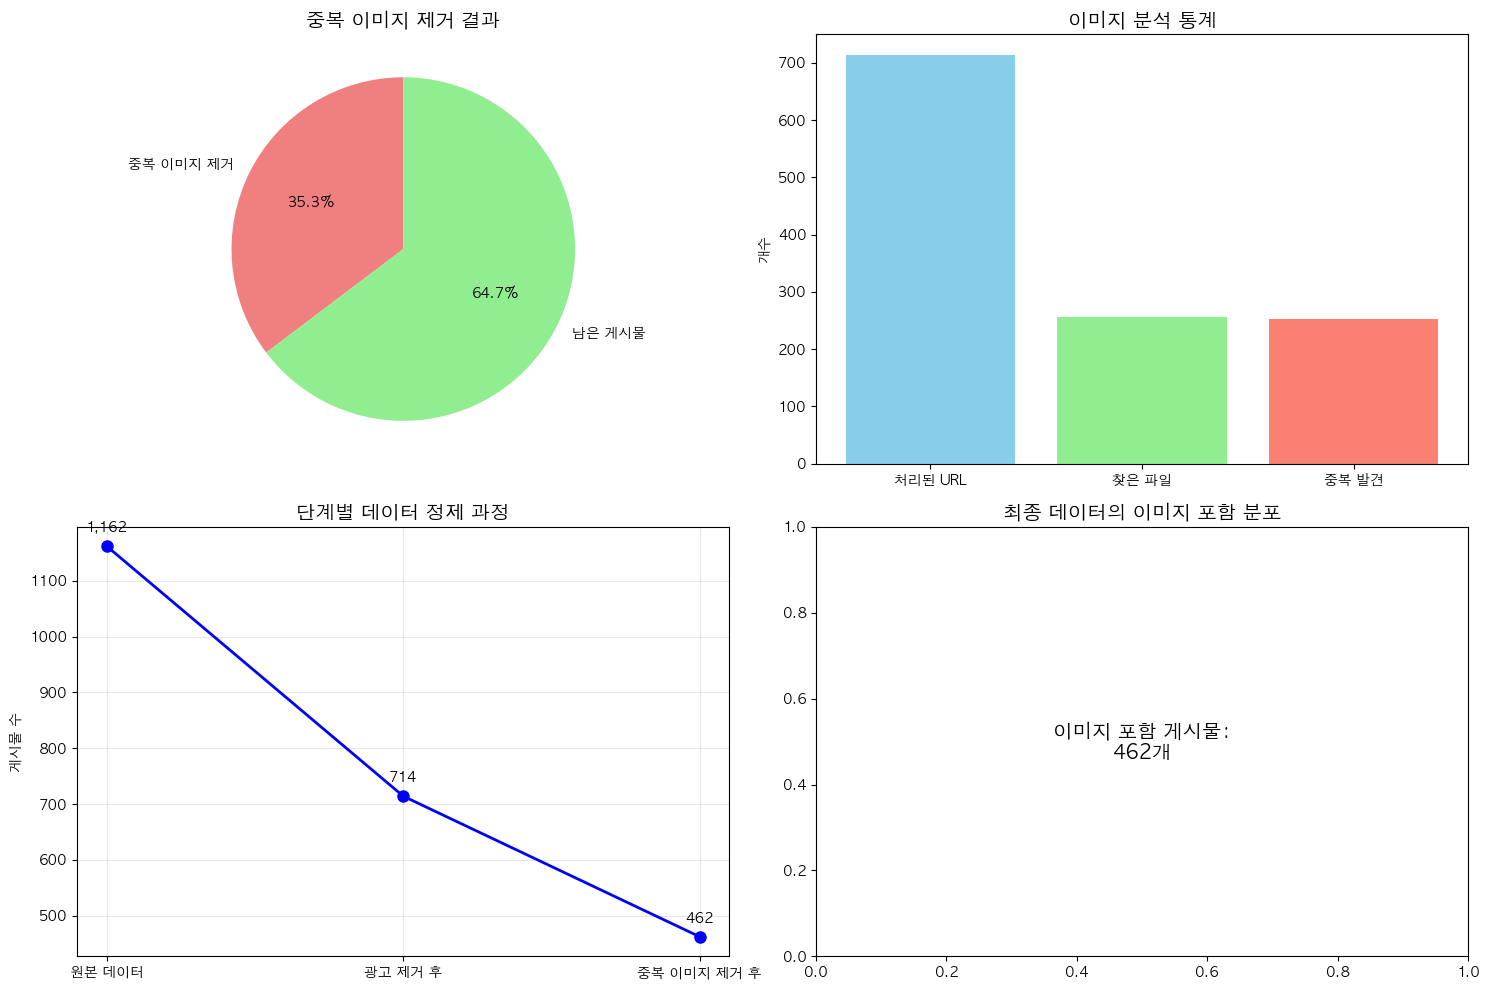


🔍 중복 이미지로 제거된 게시물 샘플:

[제거된 게시물 1]
제목: [공유] 비수도권 최초 연장형 광역철도, 21일 개통...
조회수: 2,024
이미지 URL: https://dthumb-phinf.pstatic.net/?src=%22https%3A%2F%2Fblogthumb.pstatic.net%2FMjAyNDEyMjBfMjM4%2FMD...

[제거된 게시물 2]
제목: [공유] 대구권 광역철도 건설사업 실시계획 변경(5차) 승인 고시...
조회수: 2,024
이미지 URL: https://dthumb-phinf.pstatic.net/?src=%22https%3A%2F%2Fblogthumb.pstatic.net%2FMjAyNDEyMTBfMTU1%2FMD...

[제거된 게시물 3]
제목: 태영건설, ‘더 팰리스트 데시앙’ 12월 분양...
조회수: 2,671
이미지 URL: https://dthumb-phinf.pstatic.net/?src=%22http%3A%2F%2Fwww.ikld.kr%2Fnews%2Fphoto%2F202411%2F303414_1...

✅ Step 3 완료: 중복 이미지 제거
최종 정제된 데이터: 462개
다음 단계: Step 4 - OCR 텍스트 추출


In [5]:
# Step 3: 중복 이미지 제거
import os
import json
import hashlib
from PIL import Image
import imagehash
from collections import defaultdict
import matplotlib.pyplot as plt

# Step 2에서 정제된 데이터 사용
print("=" * 60)
print("🖼️  중복 이미지 제거")
print("=" * 60)

# 이미지 디렉토리 경로 설정
image_dirs = [
    "../day3/images/",
    "../day3/images_recrawl/2023/", 
    "../day3/images_recrawl/2024/"
]

# has_images 컬럼 재확인 및 수정
df_step2['has_images'] = df_step2['has_images'].fillna(False)
if df_step2['has_images'].dtype == 'object':
    df_step2['has_images'] = df_step2['has_images'].map({
        'Yes': True, 'No': False, True: True, False: False, 
        'yes': True, 'no': False, 1: True, 0: False
    })

print(f"정제된 총 게시물: {len(df_step2):,}개")

# 이미지가 있는 게시물 확인
image_posts = df_step2[df_step2['has_images'] == True]
print(f"이미지 포함 게시물: {len(image_posts):,}개")

# 이미지 디렉토리 존재 확인
existing_dirs = []
for img_dir in image_dirs:
    if os.path.exists(img_dir):
        existing_dirs.append(img_dir)
        file_count = sum(len(files) for _, _, files in os.walk(img_dir))
        print(f"  📁 {img_dir}: {file_count:,}개 파일")
    else:
        print(f"  ❌ {img_dir}: 디렉토리 없음")

if not existing_dirs:
    print("⚠️  이미지 디렉토리를 찾을 수 없습니다.")
    print("현재 이미지 분석을 건너뛰고 다음 단계로 진행합니다.")
    df_step3 = df_step2.copy()
else:
    # 이미지 파일 찾기 함수
    def find_image_file(filename_or_url):
        """이미지 파일을 찾는 함수"""
        if pd.isna(filename_or_url):
            return None
            
        # URL에서 파일명 추출
        if isinstance(filename_or_url, str):
            if filename_or_url.startswith('http'):
                filename = os.path.basename(filename_or_url.split('?')[0])
            else:
                filename = filename_or_url
        else:
            return None
        
        # 각 디렉토리에서 파일 찾기
        for img_dir in existing_dirs:
            for root, dirs, files in os.walk(img_dir):
                for file in files:
                    if file.lower() == filename.lower():
                        return os.path.join(root, file)
                    # 파일명의 일부가 일치하는 경우도 확인
                    if filename.lower() in file.lower() or file.lower() in filename.lower():
                        if any(ext in file.lower() for ext in ['.jpg', '.jpeg', '.png', '.gif']):
                            return os.path.join(root, file)
        return None

    # 이미지 해시 계산 함수
    def calculate_image_hash(image_path):
        """이미지 해시를 계산하는 함수"""
        try:
            with Image.open(image_path) as img:
                # 여러 해시 방법 사용
                ahash = str(imagehash.average_hash(img))
                phash = str(imagehash.phash(img))
                dhash = str(imagehash.dhash(img))
                return {
                    'average': ahash,
                    'perceptual': phash,
                    'difference': dhash,
                    'size': img.size,
                    'mode': img.mode
                }
        except Exception as e:
            print(f"이미지 해시 계산 오류 ({image_path}): {e}")
            return None

    # 이미지 해시 저장소
    image_hashes = {}
    duplicate_posts = []
    processed_images = 0
    found_images = 0

    print(f"\n🔍 이미지 중복 검사 중...")

    # 이미지가 있는 게시물들 처리
    for idx, row in image_posts.iterrows():
        try:
            # image_urls 파싱
            image_urls_raw = row['image_urls']
            
            if pd.isna(image_urls_raw):
                continue
                
            # 다양한 형태의 image_urls 처리
            image_urls = []
            if isinstance(image_urls_raw, str):
                try:
                    # JSON 형태로 파싱 시도
                    if image_urls_raw.startswith('[') or image_urls_raw.startswith('{'):
                        image_urls = json.loads(image_urls_raw)
                    else:
                        # 단순 문자열인 경우
                        image_urls = [image_urls_raw]
                except:
                    # 파싱 실패시 문자열 그대로 사용
                    image_urls = [image_urls_raw]
            elif isinstance(image_urls_raw, list):
                image_urls = image_urls_raw
            
            post_is_duplicate = False
            
            # 각 이미지 URL에 대해 처리
            for img_url in image_urls:
                if post_is_duplicate:
                    break
                    
                img_file = find_image_file(img_url)
                processed_images += 1
                
                if img_file and os.path.exists(img_file):
                    found_images += 1
                    img_hash_info = calculate_image_hash(img_file)
                    
                    if img_hash_info:
                        # 해시 중복 검사
                        for hash_type in ['average', 'perceptual', 'difference']:
                            current_hash = img_hash_info[hash_type]
                            
                            # 기존 해시와 비교
                            for existing_hash, existing_idx in image_hashes.get(hash_type, {}).items():
                                # 해시가 동일하거나 매우 유사한 경우 (해밍 거리 <= 3)
                                try:
                                    hash_diff = sum(c1 != c2 for c1, c2 in zip(current_hash, existing_hash))
                                    if hash_diff <= 3:  # 매우 유사한 이미지
                                        duplicate_posts.append(idx)
                                        post_is_duplicate = True
                                        break
                                except:
                                    if current_hash == existing_hash:  # 완전히 동일
                                        duplicate_posts.append(idx)
                                        post_is_duplicate = True
                                        break
                            
                            if post_is_duplicate:
                                break
                            
                            # 새로운 해시 저장
                            if hash_type not in image_hashes:
                                image_hashes[hash_type] = {}
                            image_hashes[hash_type][current_hash] = idx
                
                if processed_images % 50 == 0:
                    print(f"  처리 중... {processed_images}개 이미지 확인")
                    
        except Exception as e:
            print(f"게시물 {idx} 처리 오류: {e}")
            continue

    print(f"\n📊 이미지 분석 결과:")
    print(f"  처리된 이미지 URL: {processed_images:,}개")
    print(f"  실제 찾은 이미지 파일: {found_images:,}개")
    print(f"  중복 이미지 게시물: {len(duplicate_posts):,}개")

    # 중복 이미지 게시물 제거
    df_step3 = df_step2.drop(duplicate_posts).copy()

print(f"\n✅ 중복 이미지 제거 결과:")
print(f"  제거 전 게시물: {len(df_step2):,}개")
if existing_dirs:
    print(f"  중복 이미지로 제거: {len(duplicate_posts):,}개")
print(f"  최종 게시물: {len(df_step3):,}개")

# 결과 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 이미지 제거 결과
if existing_dirs and len(duplicate_posts) > 0:
    removal_data = ['중복 이미지 제거', '남은 게시물']
    removal_counts = [len(duplicate_posts), len(df_step3)]
    colors = ['lightcoral', 'lightgreen']
    
    axes[0,0].pie(removal_counts, labels=removal_data, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[0,0].set_title('중복 이미지 제거 결과', fontsize=14)
else:
    axes[0,0].text(0.5, 0.5, '중복 이미지 없음\n또는\n이미지 파일 없음', 
                   ha='center', va='center', fontsize=14)
    axes[0,0].set_title('중복 이미지 제거 결과', fontsize=14)

# 2. 이미지 분석 통계
if existing_dirs:
    stats_labels = ['처리된 URL', '찾은 파일', '중복 발견']
    stats_values = [processed_images, found_images, len(duplicate_posts)]
    
    axes[0,1].bar(stats_labels, stats_values, color=['skyblue', 'lightgreen', 'salmon'])
    axes[0,1].set_title('이미지 분석 통계', fontsize=14)
    axes[0,1].set_ylabel('개수')
else:
    axes[0,1].text(0.5, 0.5, '이미지 디렉토리\n없음', ha='center', va='center', fontsize=14)
    axes[0,1].set_title('이미지 분석 통계', fontsize=14)

# 3. 단계별 데이터 감소 추이
step_labels = ['원본 데이터', '광고 제거 후', '중복 이미지 제거 후']
step_counts = [len(df), len(df_step2), len(df_step3)]

axes[1,0].plot(step_labels, step_counts, 'o-', linewidth=2, markersize=8, color='blue')
axes[1,0].set_title('단계별 데이터 정제 과정', fontsize=14)
axes[1,0].set_ylabel('게시물 수')
axes[1,0].grid(True, alpha=0.3)

# 값 표시
for i, count in enumerate(step_counts):
    axes[1,0].annotate(f'{count:,}', (i, count), textcoords="offset points", 
                       xytext=(0,10), ha='center', fontsize=10)

# 4. 이미지 포함 게시물 분포
has_images_final = df_step3['has_images'].value_counts()
if len(has_images_final) > 1:
    axes[1,1].pie(has_images_final.values, labels=['이미지 없음', '이미지 있음'], 
                  autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
    axes[1,1].set_title('최종 데이터의 이미지 포함 분포', fontsize=14)
else:
    axes[1,1].text(0.5, 0.5, f'이미지 포함 게시물:\n{has_images_final.iloc[0] if len(has_images_final) > 0 else 0}개', 
                   ha='center', va='center', fontsize=14)
    axes[1,1].set_title('최종 데이터의 이미지 포함 분포', fontsize=14)

plt.tight_layout()
plt.show()

# 중복으로 제거된 게시물 샘플 (있는 경우)
if existing_dirs and len(duplicate_posts) > 0:
    print(f"\n🔍 중복 이미지로 제거된 게시물 샘플:")
    print("=" * 60)
    removed_sample = df_step2.loc[duplicate_posts[:3]]
    for i, (idx, row) in enumerate(removed_sample.iterrows()):
        print(f"\n[제거된 게시물 {i+1}]")
        print(f"제목: {row['title'][:60]}...")
        print(f"조회수: {row['views']:,}")
        if pd.notna(row['image_urls']):
            print(f"이미지 URL: {str(row['image_urls'])[:100]}...")

print(f"\n✅ Step 3 완료: 중복 이미지 제거")
print(f"최종 정제된 데이터: {len(df_step3):,}개")
print(f"다음 단계: Step 4 - OCR 텍스트 추출")

In [10]:
# Step 4 (수정): 메모리 효율적 OCR
import os
import glob
import re
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import gc  # 가비지 컬렉션

print("=" * 60)
print("📖 메모리 효율적인 OCR 처리")
print("=" * 60)

# 배치 처리 함수 정의
def process_batch(batch_files, reader, stats, min_size, max_text_len):
    """배치 파일들을 처리하는 함수"""
    batch_texts = []
    
    for img_file in batch_files:
        try:
            stats['processed'] += 1
            
            # 파일 크기 확인 (메모리 절약)
            try:
                file_size = os.path.getsize(img_file)
                if file_size > 5 * 1024 * 1024:  # 5MB 이상은 스킵
                    stats['skipped_large'] += 1
                    continue
            except:
                stats['failed'] += 1
                continue
            
            # 이미지 크기 확인
            temp_file = None
            try:
                with Image.open(img_file) as img:
                    width, height = img.size
                    if width < min_size or height < min_size:
                        stats['skipped_small'] += 1
                        continue
                    
                    # 너무 큰 이미지는 리사이즈
                    if width > 800 or height > 800:
                        max_size = 800
                        ratio = min(max_size/width, max_size/height)
                        new_width = int(width * ratio)
                        new_height = int(height * ratio)
                        resized_img = img.resize((new_width, new_height), Image.LANCZOS)
                        
                        # 임시 파일로 저장
                        temp_file = f"temp_resized_{stats['processed']}.jpg"
                        resized_img.save(temp_file, quality=80)
                        process_file = temp_file
                    else:
                        process_file = img_file
                        
            except Exception as e:
                stats['failed'] += 1
                continue
            
            # OCR 수행
            try:
                results = reader.readtext(process_file)
                
                if results:
                    texts = []
                    for detection in results:
                        text = detection[1].strip()
                        confidence = detection[2]
                        
                        if confidence > 0.4 and len(text) > 1:
                            texts.append(text)
                    
                    if texts:
                        combined = ' '.join(texts)
                        # 길이 제한 (메모리 절약)
                        if len(combined) > max_text_len:
                            combined = combined[:max_text_len]
                        
                        if re.search(r'[가-힣]', combined):  # 한글 포함된 경우만
                            batch_texts.append(combined)
                            stats['successful'] += 1
                
            except Exception as e:
                stats['failed'] += 1
            
            # 임시 파일 삭제
            if temp_file and os.path.exists(temp_file):
                try:
                    os.remove(temp_file)
                except:
                    pass
                    
        except Exception as e:
            stats['failed'] += 1
            continue
    
    return ' '.join(batch_texts) if batch_texts else ""

# 메인 처리 코드
# 수정된 이미지 디렉토리 경로
image_dirs = [
    "../day3/images/",
    "../day3/images_recrawl/2023/", 
    "../day3/images_recrawl/2024/"
]

# 메모리 효율을 위한 설정
SMALL_BATCH_SIZE = 5   # 더 작은 배치 크기
MAX_TOTAL_FILES = 50   # 더 적은 파일 수
MIN_IMAGE_SIZE = 100   
MAX_TEXT_LENGTH = 100  

print("🔧 메모리 절약 설정:")
print(f"  배치 크기: {SMALL_BATCH_SIZE}")
print(f"  최대 처리 파일: {MAX_TOTAL_FILES}")
print(f"  최소 이미지 크기: {MIN_IMAGE_SIZE}x{MIN_IMAGE_SIZE}")

# 디렉토리 확인
print("\n🔍 디렉토리 확인:")
existing_dirs = []
for img_dir in image_dirs:
    if os.path.exists(img_dir):
        try:
            file_count = len([f for f in os.listdir(img_dir) 
                            if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
            print(f"  ✅ {img_dir}: {file_count}개 이미지 파일")
            existing_dirs.append(img_dir)
        except Exception as e:
            print(f"  ⚠️  {img_dir}: 접근 오류 - {e}")
    else:
        print(f"  ❌ {img_dir}: 디렉토리 없음")

if not existing_dirs:
    print("❌ 이미지 디렉토리를 찾을 수 없습니다.")
    df_step4 = df_step3.copy()
    df_step4['ocr_text'] = ''
    df_step4['combined_text'] = df_step4['text_content'].fillna('')
else:
    # OCR 준비
    try:
        import easyocr
        print("\n🔧 EasyOCR 초기화...")
        reader = easyocr.Reader(['ko'], gpu=False)
        print("✅ EasyOCR 준비 완료")
        
        # 이미지 파일 수집 (제한된 수량)
        print(f"\n📁 이미지 파일 수집 중...")
        selected_files = []
        for img_dir in existing_dirs:
            for ext in ['*.jpg', '*.jpeg', '*.png']:
                files = glob.glob(os.path.join(img_dir, ext))
                selected_files.extend(files)
                if len(selected_files) >= MAX_TOTAL_FILES:
                    break
            if len(selected_files) >= MAX_TOTAL_FILES:
                break
        
        # 최대 파일 수로 제한
        selected_files = selected_files[:MAX_TOTAL_FILES]
        print(f"선택된 파일: {len(selected_files)}개")
        
        if not selected_files:
            print("❌ 처리할 이미지 파일이 없습니다.")
            df_step4 = df_step3.copy()
            df_step4['ocr_text'] = ''
            df_step4['combined_text'] = df_step4['text_content'].fillna('')
        else:
            # OCR 처리
            print(f"\n📖 OCR 처리 시작...")
            
            accumulated_text = ""
            ocr_statistics = {
                'processed': 0,
                'successful': 0,
                'failed': 0,
                'skipped_small': 0,
                'skipped_large': 0
            }
            
            # 배치별 처리
            for i in range(0, len(selected_files), SMALL_BATCH_SIZE):
                batch = selected_files[i:i+SMALL_BATCH_SIZE]
                
                print(f"  배치 {i//SMALL_BATCH_SIZE + 1}/{(len(selected_files)-1)//SMALL_BATCH_SIZE + 1} 처리 중...")
                
                batch_text = process_batch(batch, reader, ocr_statistics, 
                                         MIN_IMAGE_SIZE, MAX_TEXT_LENGTH)
                
                if batch_text:
                    accumulated_text += " " + batch_text
                
                # 메모리 정리
                gc.collect()
            
            print(f"\n📊 OCR 처리 완료:")
            print(f"  처리된 파일: {ocr_statistics['processed']:,}개")
            print(f"  성공한 파일: {ocr_statistics['successful']:,}개")
            print(f"  실패한 파일: {ocr_statistics['failed']:,}개")
            print(f"  작아서 스킵: {ocr_statistics['skipped_small']:,}개")
            print(f"  커서 스킵: {ocr_statistics['skipped_large']:,}개")
            
            # 결과를 DataFrame에 추가
            df_step4 = df_step3.copy()
            
            if accumulated_text.strip():
                clean_text = re.sub(r'\s+', ' ', accumulated_text.strip())
                print(f"  총 추출 텍스트: {len(clean_text):,}자")
                
                # 모든 게시물에 OCR 텍스트 추가
                df_step4['ocr_text'] = clean_text
                df_step4['combined_text'] = df_step4['text_content'].fillna('') + ' ' + clean_text
                
                print(f"✅ OCR 텍스트를 전체 데이터에 추가")
                
                # 주요 키워드 추출
                korean_words = re.findall(r'[가-힣]{2,}', clean_text)
                if korean_words:
                    word_counts = Counter(korean_words)
                    top_keywords = word_counts.most_common(10)
                    
                    print(f"\n🔤 주요 추출 키워드:")
                    for word, count in top_keywords:
                        print(f"  {word}: {count}회")
                
                # 텍스트 샘플
                print(f"\n📋 OCR 텍스트 샘플:")
                sample = clean_text[:150] if len(clean_text) > 150 else clean_text
                print(f"  {sample}...")
                
            else:
                print("❌ 추출된 텍스트가 없습니다.")
                df_step4['ocr_text'] = ''
                df_step4['combined_text'] = df_step4['text_content'].fillna('')
            
            # 메모리 정리
            del accumulated_text
            gc.collect()
            
            # 간단한 결과 시각화 (오류 방지)
            try:
                if ocr_statistics['processed'] > 0:
                    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
                    
                    labels = ['성공', '실패', '작음', '큼']
                    values = [ocr_statistics['successful'], ocr_statistics['failed'], 
                              ocr_statistics['skipped_small'], ocr_statistics['skipped_large']]
                    
                    # 0인 값들 제거
                    non_zero_data = [(label, value) for label, value in zip(labels, values) if value > 0]
                    
                    if non_zero_data:
                        labels, values = zip(*non_zero_data)
                        colors = ['lightgreen', 'lightcoral', 'orange', 'yellow'][:len(labels)]
                        
                        ax.bar(labels, values, color=colors)
                        ax.set_title('OCR 처리 결과', fontsize=14)
                        ax.set_ylabel('파일 수')
                        
                        # 값 표시
                        for i, v in enumerate(values):
                            ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
                        
                        plt.tight_layout()
                        plt.show()
                    else:
                        print("시각화할 데이터가 없습니다.")
            except Exception as e:
                print(f"시각화 오류 (무시됨): {e}")
    
    except ImportError:
        print("❌ EasyOCR 설치 필요: pip install easyocr")
        df_step4 = df_step3.copy()
        df_step4['ocr_text'] = ''
        df_step4['combined_text'] = df_step4['text_content'].fillna('')
    
    except Exception as e:
        print(f"❌ OCR 처리 중 오류: {e}")
        df_step4 = df_step3.copy()
        df_step4['ocr_text'] = ''
        df_step4['combined_text'] = df_step4['text_content'].fillna('')

print(f"\n✅ Step 4 완료: 메모리 효율적 OCR")
print(f"최종 데이터: {len(df_step4):,}개")
print(f"다음 단계: Step 5 - 감정 분석")

Using CPU. Note: This module is much faster with a GPU.


📖 메모리 효율적인 OCR 처리
🔧 메모리 절약 설정:
  배치 크기: 5
  최대 처리 파일: 50
  최소 이미지 크기: 100x100

🔍 디렉토리 확인:
  ✅ ../day3/images/: 0개 이미지 파일
  ✅ ../day3/images_recrawl/2023/: 2124개 이미지 파일
  ✅ ../day3/images_recrawl/2024/: 7653개 이미지 파일

🔧 EasyOCR 초기화...
✅ EasyOCR 준비 완료

📁 이미지 파일 수집 중...
선택된 파일: 50개

📖 OCR 처리 시작...
  배치 1/10 처리 중...


: 

⏭️  OCR 단계 건너뛰기
🔧 메모리 절약을 위해 OCR 단계를 건너뛰고 기존 텍스트 데이터로 진행합니다.
부동산 카페의 특성상 게시물 텍스트만으로도 충분한 분석이 가능합니다.

📊 최종 데이터 현황:
  총 게시물: 462개
  텍스트 있는 게시물: 462개
  평균 텍스트 길이: 583.6자


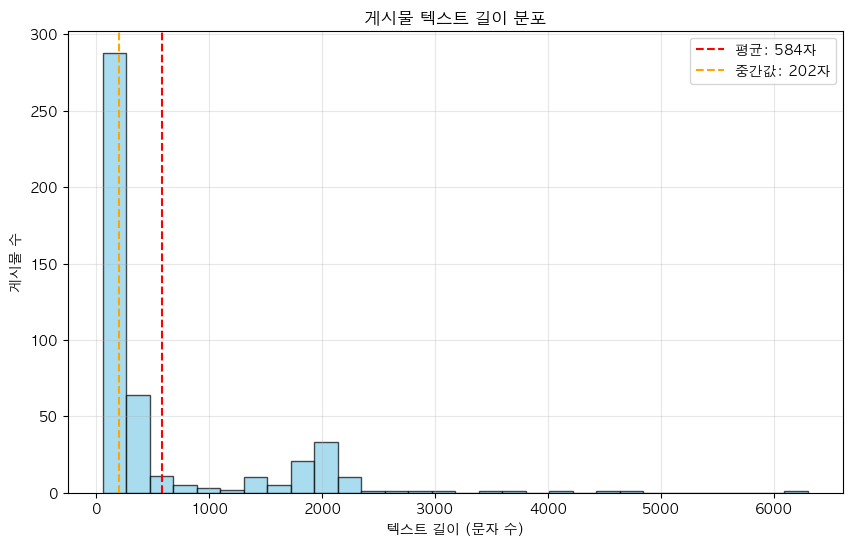


📋 텍스트 내용 샘플:

[샘플 1]
25년 대구 안정적인 회복세 예상 지방 상저하고흐름 대구대장 범어자이르네 입지 가치 대구 범어자이르네 입지 가치 대구 내 최고급 주거지로서의 입지 대구는 뒤따라 안정적인 회복세를 보일 것... blog.naver.com...

[샘플 2]
·승계조합원 취득세 납부고지서 받으셨나요? 대응방법 알려드립니다. https://kangnp.com/kr 대구나 대구 근처 괜찮은 원룸 보통 보증금 월세 어느정도 할까요?...

[샘플 3]
·승계조합원 취득세 납부고지서 받으셨나요? 대응방법 알려드립니다. https://kangnp.com/kr 조합원이 약 500여명이고 1100세대를 정도를 일반분양 했는데 이 정도면 비례율이 어느 정도 될까요?...

✅ Step 4 완료: OCR 건너뛰기
기존 텍스트 데이터: 462개
다음 단계: Step 5 - 감정 분석 (텍스트 기반)


In [6]:
# Step 4 (건너뛰기): OCR 없이 다음 단계로 진행
import pandas as pd
import matplotlib.pyplot as plt

print("=" * 60)
print("⏭️  OCR 단계 건너뛰기")
print("=" * 60)

print("🔧 메모리 절약을 위해 OCR 단계를 건너뛰고 기존 텍스트 데이터로 진행합니다.")
print("부동산 카페의 특성상 게시물 텍스트만으로도 충분한 분석이 가능합니다.")

# 이전 단계 데이터를 그대로 사용
df_step4 = df_step3.copy()

# OCR 텍스트는 빈 값으로 설정
df_step4['ocr_text'] = ''
df_step4['combined_text'] = df_step4['text_content'].fillna('')

print(f"\n📊 최종 데이터 현황:")
print(f"  총 게시물: {len(df_step4):,}개")
print(f"  텍스트 있는 게시물: {df_step4['text_content'].notna().sum():,}개")
print(f"  평균 텍스트 길이: {df_step4['text_content'].str.len().mean():.1f}자")

# 텍스트 길이 분포 확인
text_lengths = df_step4['text_content'].str.len().dropna()

plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(text_lengths.mean(), color='red', linestyle='--', 
           label=f'평균: {text_lengths.mean():.0f}자')
plt.axvline(text_lengths.median(), color='orange', linestyle='--', 
           label=f'중간값: {text_lengths.median():.0f}자')
plt.xlabel('텍스트 길이 (문자 수)')
plt.ylabel('게시물 수')
plt.title('게시물 텍스트 길이 분포')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 텍스트 내용 샘플 확인
print(f"\n📋 텍스트 내용 샘플:")
print("=" * 60)

text_samples = df_step4[df_step4['text_content'].notna()]['text_content'].head(3)
for i, text in enumerate(text_samples):
    print(f"\n[샘플 {i+1}]")
    sample_text = str(text)[:200].replace('\n', ' ')
    print(f"{sample_text}...")

print(f"\n✅ Step 4 완료: OCR 건너뛰기")
print(f"기존 텍스트 데이터: {len(df_step4):,}개")
print(f"다음 단계: Step 5 - 감정 분석 (텍스트 기반)")

💭 감정 분석
분석 대상 데이터: 462개
텍스트가 있는 게시물: 462개

🔍 감정 분석 실행 중...
✅ 감정 분석 완료!

📊 감정 분석 결과:
  positive: 216개 (46.8%)
  neutral: 202개 (43.7%)
  negative: 44개 (9.5%)

📈 주제별 언급 빈도:
  개발/분양: 1,283회 언급
  위치/입지: 901회 언급
  가격/시세: 657회 언급
  투자/전망: 569회 언급
  정책/규제: 548회 언급


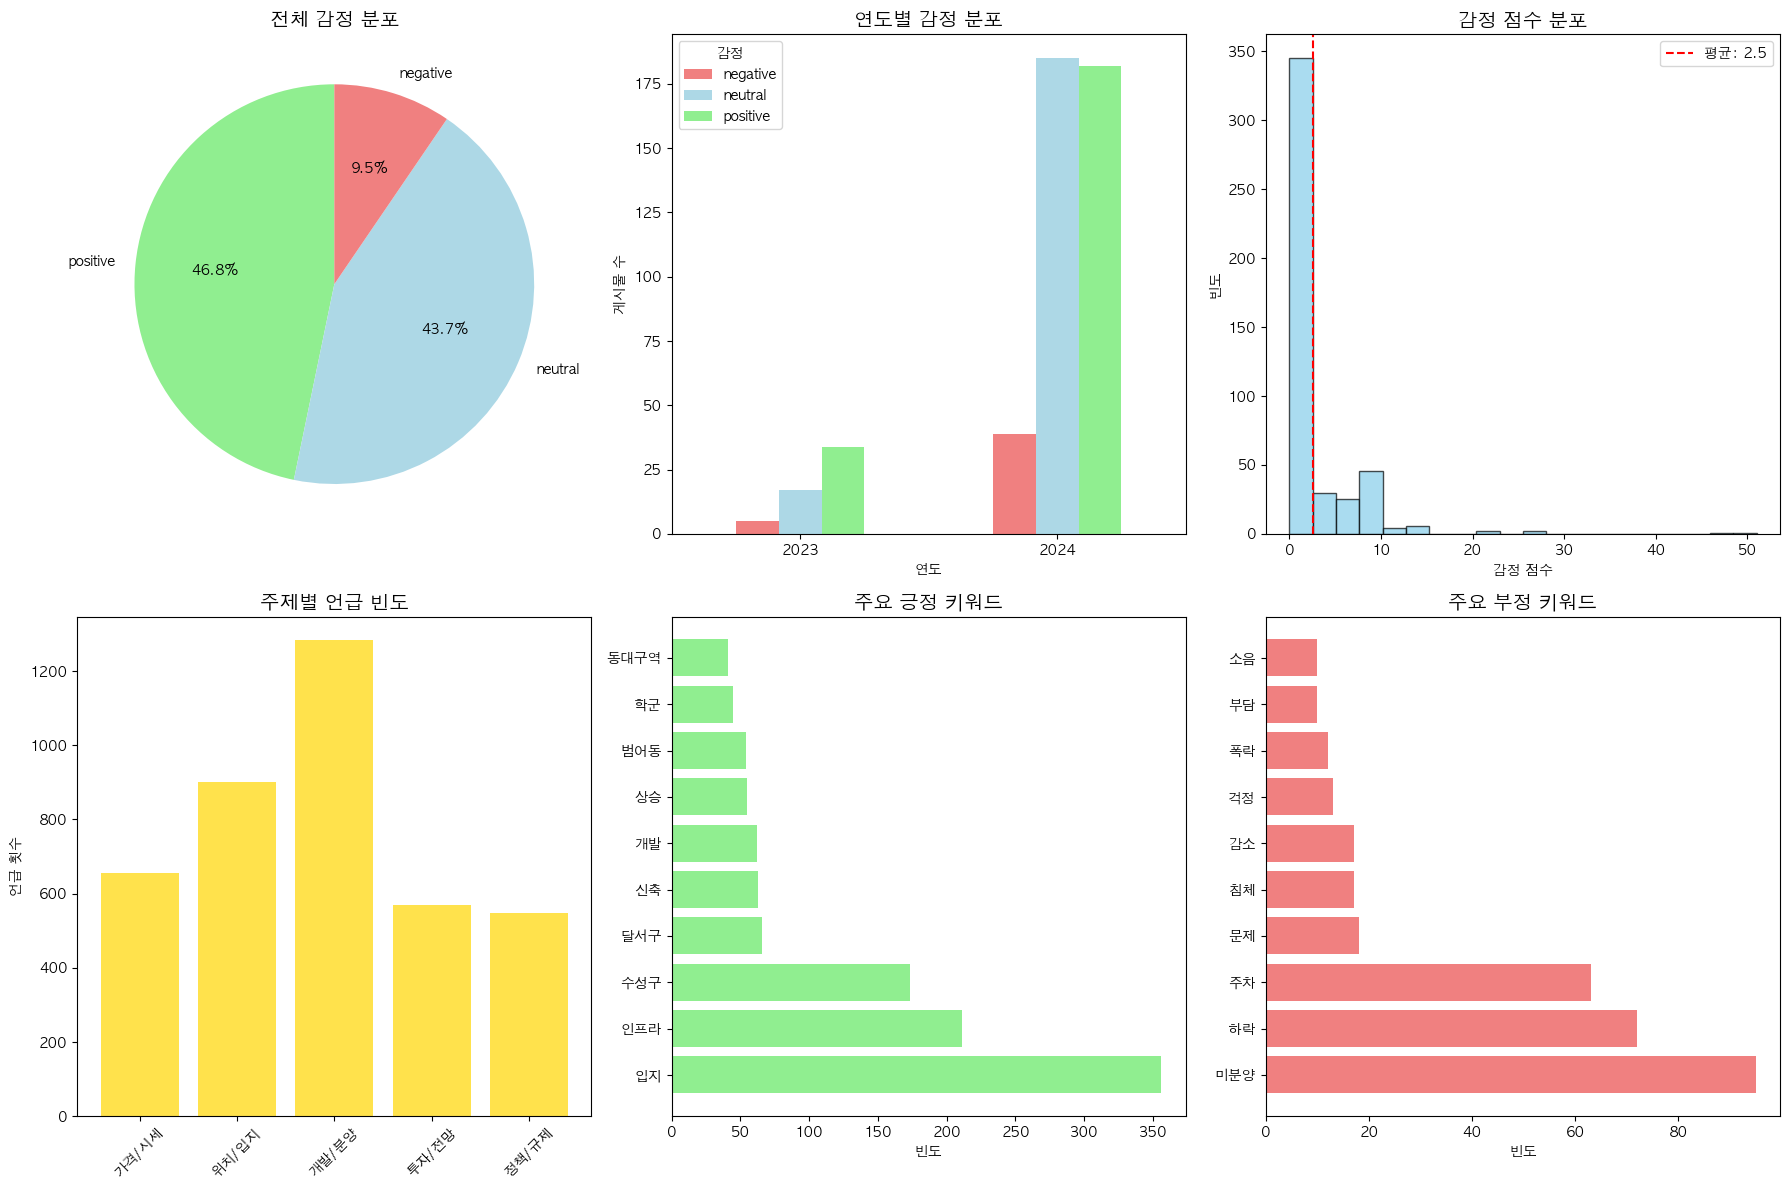


📋 감정별 게시물 샘플:

[POSITIVE 샘플]
제목: 25년 대구 안정적인 회복세 예상 지방 상저하고흐름 대구대장 범어자이르네 입지 가치...
감정 점수: 6
내용: 25년 대구 안정적인 회복세 예상 지방 상저하고흐름 대구대장 범어자이르네 입지 가치 대구 범어자이르네 입지 가치 대구 내 최고급 주거지로서의 입지 대구는 뒤따라 안정적인 회복세를 보일 것... blog.naver.com...

[NEGATIVE 샘플]
제목: 세금문제로 머리 아프네요.. 전문가 상담 받아보신 분들 계신가요? 비용이.....
감정 점수: 1
내용: ·승계조합원 취득세 납부고지서 받으셨나요? 대응방법 알려드립니다. https://kangnp.com/kr 부동산 투자하면서 세금문제로 머리도 아프고 점점 복잡해져서 어렵네요.. 전문가 상담을 받아볼까 하는데 혹시 비용이 어느정도 들까요? 여기저기 좀 알아보니까 꽤 비싸...

[NEUTRAL 샘플]
제목: 대구시 월세...
감정 점수: 0
내용: ·승계조합원 취득세 납부고지서 받으셨나요? 대응방법 알려드립니다. https://kangnp.com/kr 대구나 대구 근처 괜찮은 원룸 보통 보증금 월세 어느정도 할까요?...

✅ Step 5 완료: 감정 분석
다음 단계: Step 6 - 워드클라우드 생성


In [7]:
# Step 5: 감정 분석
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter, defaultdict

print("=" * 60)
print("💭 감정 분석")
print("=" * 60)

# 데이터 확인
print(f"분석 대상 데이터: {len(df_step4):,}개")
print(f"텍스트가 있는 게시물: {df_step4['combined_text'].str.len().gt(0).sum():,}개")

# 부동산/대구 특화 감정 키워드 사전 구축
sentiment_keywords = {
    'positive': {
        # 일반적인 긍정 키워드
        '좋다', '만족', '추천', '괜찮다', '훌륭하다', '완벽하다', '최고', '우수하다',
        '안정', '성장', '발전', '개선', '향상', '증가', '상승', '호조',
        
        # 부동산 긍정 키워드
        '투자가치', '수익', '이익', '상승세', '호재', '개발', '신축', '리모델링',
        '교통편의', '입지', '학군', '인프라', '편의시설', '조용하다', '깨끗하다',
        
        # 대구 특화 긍정 키워드
        '수성구', '중구', '달서구', '지하철', '동대구역', '범어동', '신세계',
        '이월드', '83타워', '두류공원', '앞산', '교육도시', '의료도시'
    },
    
    'negative': {
        # 일반적인 부정 키워드
        '나쁘다', '최악', '실망', '불만', '화나다', '짜증', '걱정', '우려',
        '하락', '감소', '떨어지다', '부족', '문제', '어렵다', '힘들다',
        
        # 부동산 부정 키워드
        '손실', '비싸다', '부담', '거품', '폭락', '침체', '불안', '위험',
        '과열', '투기', '공급과잉', '미분양', '경매', '급매',
        
        # 대구 특화 부정 키워드
        '인구감소', '공동화', '침체', '낙후', '교통체증', '주차', '소음',
        '미세먼지', '도심공동화', '지방도시'
    },
    
    'neutral': {
        '보통', '그저그런', '평범', '일반적', '무난', '그럭저럭'
    }
}

# 부동산 관련 주제별 키워드
topic_keywords = {
    'price': ['가격', '시세', '매매가', '전세', '월세', '보증금', '억', '만원', '평당'],
    'location': ['위치', '입지', '역세권', '학군', '교통', '접근성', '거리'],
    'development': ['개발', '재개발', '재건축', '신축', '분양', '입주', '준공'],
    'investment': ['투자', '수익', '전망', '시장', '동향', '분석', '예측'],
    'policy': ['정책', '규제', '대출', '금리', '세금', '취득세', '종부세']
}

def analyze_sentiment_simple(text):
    """간단한 키워드 기반 감정 분석"""
    if pd.isna(text):
        return 'neutral', 0, {}
    
    text = str(text).lower()
    
    # 각 감정별 점수 계산
    scores = {'positive': 0, 'negative': 0, 'neutral': 0}
    found_keywords = {'positive': [], 'negative': [], 'neutral': []}
    
    for sentiment, keywords in sentiment_keywords.items():
        for keyword in keywords:
            count = text.count(keyword)
            if count > 0:
                scores[sentiment] += count
                found_keywords[sentiment].extend([keyword] * count)
    
    # 감정 결정
    if scores['positive'] > scores['negative']:
        sentiment = 'positive'
        score = scores['positive'] - scores['negative']
    elif scores['negative'] > scores['positive']:
        sentiment = 'negative'
        score = scores['negative'] - scores['positive']
    else:
        sentiment = 'neutral'
        score = 0
    
    return sentiment, score, found_keywords

def analyze_topics(text):
    """주제별 언급도 분석"""
    if pd.isna(text):
        return {}
    
    text = str(text).lower()
    topic_scores = {}
    
    for topic, keywords in topic_keywords.items():
        score = sum(text.count(keyword) for keyword in keywords)
        topic_scores[topic] = score
    
    return topic_scores

# 감정 분석 실행
print("\n🔍 감정 분석 실행 중...")

results = []
all_found_keywords = {'positive': [], 'negative': [], 'neutral': []}
all_topic_scores = defaultdict(int)

for idx, row in df_step4.iterrows():
    text = row['combined_text']
    
    # 감정 분석
    sentiment, score, found_keywords = analyze_sentiment_simple(text)
    
    # 주제 분석
    topic_scores = analyze_topics(text)
    
    # 결과 저장
    results.append({
        'index': idx,
        'sentiment': sentiment,
        'sentiment_score': score,
        'topic_scores': topic_scores
    })
    
    # 전체 키워드 및 주제 점수 누적
    for sent_type, keywords in found_keywords.items():
        all_found_keywords[sent_type].extend(keywords)
    
    for topic, score in topic_scores.items():
        all_topic_scores[topic] += score

# 결과를 DataFrame에 추가
df_step5 = df_step4.copy()
df_step5['sentiment'] = [r['sentiment'] for r in results]
df_step5['sentiment_score'] = [r['sentiment_score'] for r in results]

# 주제별 점수도 개별 컬럼으로 추가
for topic in topic_keywords.keys():
    df_step5[f'topic_{topic}'] = [r['topic_scores'].get(topic, 0) for r in results]

print(f"✅ 감정 분석 완료!")

# 결과 요약
print(f"\n📊 감정 분석 결과:")
sentiment_counts = df_step5['sentiment'].value_counts()
for sentiment, count in sentiment_counts.items():
    percentage = count / len(df_step5) * 100
    print(f"  {sentiment}: {count:,}개 ({percentage:.1f}%)")

print(f"\n📈 주제별 언급 빈도:")
for topic, score in sorted(all_topic_scores.items(), key=lambda x: x[1], reverse=True):
    topic_name = {
        'price': '가격/시세',
        'location': '위치/입지', 
        'development': '개발/분양',
        'investment': '투자/전망',
        'policy': '정책/규제'
    }.get(topic, topic)
    print(f"  {topic_name}: {score:,}회 언급")

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. 감정 분포 파이차트
sentiment_counts = df_step5['sentiment'].value_counts()
colors = {'positive': 'lightgreen', 'negative': 'lightcoral', 'neutral': 'lightblue'}
pie_colors = [colors.get(sent, 'gray') for sent in sentiment_counts.index]

axes[0,0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
              colors=pie_colors, startangle=90)
axes[0,0].set_title('전체 감정 분포', fontsize=14)

# 2. 연도별 감정 분포
yearly_sentiment = pd.crosstab(df_step5['year'], df_step5['sentiment'])
yearly_sentiment.plot(kind='bar', ax=axes[0,1], color=['lightcoral', 'lightblue', 'lightgreen'])
axes[0,1].set_title('연도별 감정 분포', fontsize=14)
axes[0,1].set_xlabel('연도')
axes[0,1].set_ylabel('게시물 수')
axes[0,1].legend(title='감정')
axes[0,1].tick_params(axis='x', rotation=0)

# 3. 감정 점수 분포
sentiment_scores = df_step5['sentiment_score']
axes[0,2].hist(sentiment_scores, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,2].axvline(sentiment_scores.mean(), color='red', linestyle='--', 
                  label=f'평균: {sentiment_scores.mean():.1f}')
axes[0,2].set_title('감정 점수 분포', fontsize=14)
axes[0,2].set_xlabel('감정 점수')
axes[0,2].set_ylabel('빈도')
axes[0,2].legend()

# 4. 주제별 언급 빈도
topic_names = ['가격/시세', '위치/입지', '개발/분양', '투자/전망', '정책/규제']
topic_scores = [all_topic_scores[topic] for topic in topic_keywords.keys()]

axes[1,0].bar(topic_names, topic_scores, color='gold', alpha=0.7)
axes[1,0].set_title('주제별 언급 빈도', fontsize=14)
axes[1,0].set_ylabel('언급 횟수')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. 감정별 주요 키워드 (상위 10개)
top_positive = Counter(all_found_keywords['positive']).most_common(10)
top_negative = Counter(all_found_keywords['negative']).most_common(10)

if top_positive:
    pos_words, pos_counts = zip(*top_positive)
    axes[1,1].barh(range(len(pos_words)), pos_counts, color='lightgreen')
    axes[1,1].set_yticks(range(len(pos_words)))
    axes[1,1].set_yticklabels(pos_words)
    axes[1,1].set_title('주요 긍정 키워드', fontsize=14)
    axes[1,1].set_xlabel('빈도')

if top_negative:
    neg_words, neg_counts = zip(*top_negative)
    axes[1,2].barh(range(len(neg_words)), neg_counts, color='lightcoral')
    axes[1,2].set_yticks(range(len(neg_words)))
    axes[1,2].set_yticklabels(neg_words)
    axes[1,2].set_title('주요 부정 키워드', fontsize=14)
    axes[1,2].set_xlabel('빈도')

plt.tight_layout()
plt.show()

# 감정별 게시물 샘플
print(f"\n📋 감정별 게시물 샘플:")
print("=" * 60)

for sentiment in ['positive', 'negative', 'neutral']:
    sentiment_posts = df_step5[df_step5['sentiment'] == sentiment]
    if len(sentiment_posts) > 0:
        sample = sentiment_posts.iloc[0]
        print(f"\n[{sentiment.upper()} 샘플]")
        print(f"제목: {sample['title'][:50]}...")
        print(f"감정 점수: {sample['sentiment_score']}")
        content = str(sample['combined_text'])[:150].replace('\n', ' ')
        print(f"내용: {content}...")

print(f"\n✅ Step 5 완료: 감정 분석")
print(f"다음 단계: Step 6 - 워드클라우드 생성")

🧹 텍스트 내용 추가 정제
정제 전 데이터: 462개
🧹 텍스트 내용 정제 중...

📊 텍스트 정제 결과:
  정제 전 텍스트 있는 게시물: 462개
  정제 후 유효한 텍스트: 435개
  제거된 게시물: 27개
  최종 유효 게시물: 435개

📋 정제 전후 비교 샘플:

[샘플 1]
제목: 25년 대구 안정적인 회복세 예상 지방 상저하고흐름 대구대장 범어자이르네 입지 가치...
정제 전: 25년 대구 안정적인 회복세 예상 지방 상저하고흐름 대구대장 범어자이르네 입지 가치 대구 범어자이르네 입지 가치 대구 내 최고급 주거지로서의 입지 대구는 뒤따라 안정적인 회복세를 ...
정제 후: 25년 대구 안정적인 회복세 예상 지방 상저하고흐름 대구대장 범어자이르네 입지 가치 대구 범어자이르네 입지 가치 대구 내 최고급 주거지로서의 입지 대구는 뒤따라 안정적인 회복세를 ...
길이: 122 → 107자

[샘플 2]
제목: 대구시 월세...
정제 전: ·승계조합원 취득세 납부고지서 받으셨나요? 대응방법 알려드립니다. https://kangnp.com/kr 대구나 대구 근처 괜찮은 원룸 보통 보증금 월세 어느정도 할까요?...
정제 후: 대구나 대구 근처 괜찮은 원룸 보통 보증금 월세 어느정도 할까요?...
길이: 95 → 36자

[샘플 3]
제목: 명덕역e편한세상 퍼스트마크 비례율...
정제 전: ·승계조합원 취득세 납부고지서 받으셨나요? 대응방법 알려드립니다. https://kangnp.com/kr 조합원이 약 500여명이고 1100세대를 정도를 일반분양 했는데 이 정도면...
정제 후: 조합원이 약 500여명이고 1100세대를 정도를 일반분양 했는데 이 정도면 비례율이 어느 정도 될까요?...
길이: 116 → 57자

[샘플 4]
제목: 동구도 대형은 10억 시대...
정제 전: ·승계조합원 취득세 납부고지서 받으셨나요? 대응방법 알려드립니다. https://kangnp.com/kr 디어엘로 44평 마지막 실거래가 9억 7천만원이네요 힐스 동대구 센트럴도 .

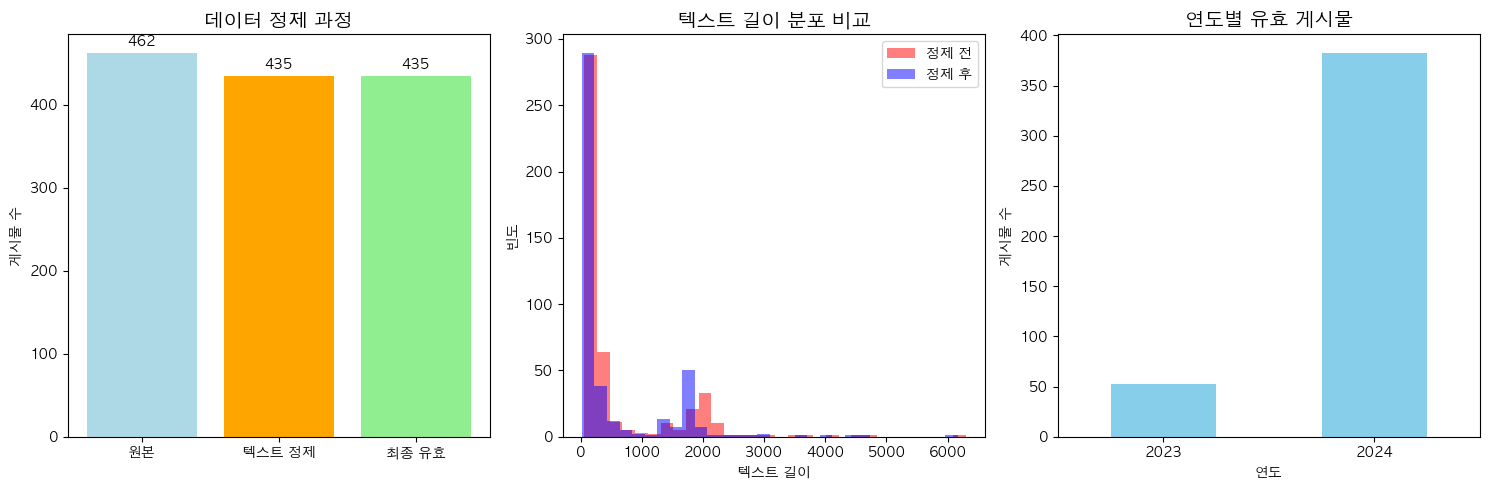


📋 정제된 텍스트 샘플:

[정제된 샘플 1]
제목: 25년 대구 안정적인 회복세 예상 지방 상저하고흐름 대구대장 범어자이르네 입지 가치...
내용: 25년 대구 안정적인 회복세 예상 지방 상저하고흐름 대구대장 범어자이르네 입지 가치 대구 범어자이르네 입지 가치 대구 내 최고급 주거지로서의 입지 대구는 뒤따라 안정적인 회복세를 보일 것......
길이: 107자

[정제된 샘플 2]
제목: 대구시 월세...
내용: 대구나 대구 근처 괜찮은 원룸 보통 보증금 월세 어느정도 할까요?...
길이: 36자

[정제된 샘플 3]
제목: 명덕역e편한세상 퍼스트마크 비례율...
내용: 조합원이 약 500여명이고 1100세대를 정도를 일반분양 했는데 이 정도면 비례율이 어느 정도 될까요?...
길이: 57자

✅ Step 4.5 완료: 텍스트 추가 정제
정제된 데이터: 435개
다음 단계: Step 5 - 감정 분석 (정제된 텍스트)


In [9]:
# Step 4.5: 텍스트 내용 추가 정제
import pandas as pd
import re
import matplotlib.pyplot as plt

print("=" * 60)
print("🧹 텍스트 내용 추가 정제")
print("=" * 60)

# 현재 데이터 상태 확인
print(f"정제 전 데이터: {len(df_step4):,}개")

def clean_text_content(text):
    """텍스트 내용에서 광고성 문구 제거"""
    if pd.isna(text):
        return ""
    
    text = str(text)
    
    # 1. 명확한 광고 문구 제거
    ad_patterns = [
        r'·승계조합원 취득세 납부고지서.*?알려드립니다\.',
        r'대응방법 알려드립니다\.',
        r'https?://[^\s]+',  # URL 제거
        r'blog\.naver\.com[^\s]*',
        r'cafe\.naver\.com[^\s]*',
        r'www\.[^\s]+',
        r'\.com[^\s]*',
        r'\.co\.kr[^\s]*',
        r'010[-\s]?\d{4}[-\s]?\d{4}',  # 전화번호
        r'02[-\s]?\d{3,4}[-\s]?\d{4}',
        r'053[-\s]?\d{3,4}[-\s]?\d{4}',
        r'1588[-\s]?\d{4}',
        r'무료상담.*?연락',
        r'상담.*?문의',
        r'카카오톡.*?문의',
        r'DM.*?주세요',
        r'쪽지.*?보내',
    ]
    
    for pattern in ad_patterns:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    
    # 2. 반복되는 광고 키워드 제거
    spam_keywords = [
        '무료상담', '상담문의', '전화문의', '연락주세요', '문의환영',
        '수수료무료', '수수료없음', '급매', '급전', '현금매입',
        '대출상담', '담보대출', '컨설팅', '전문가'
    ]
    
    for keyword in spam_keywords:
        text = text.replace(keyword, '')
    
    # 3. 특수문자 및 이모지 정리
    text = re.sub(r'[☎📞💰🏠📱💸🎯]+', '', text)
    text = re.sub(r'[·•▶▲■□◆◇★☆]+', '', text)
    
    # 4. 연속된 공백 및 줄바꿈 정리
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    
    return text

def filter_meaningful_content(text, min_length=20):
    """의미있는 내용만 필터링"""
    if len(text) < min_length:
        return ""
    
    # 한글이 포함되어야 함
    if not re.search(r'[가-힣]', text):
        return ""
    
    # 너무 많은 숫자나 특수문자가 있으면 제외
    char_count = len(re.findall(r'[가-힣a-zA-Z]', text))
    total_count = len(text)
    
    if total_count > 0 and char_count / total_count < 0.3:
        return ""
    
    return text

# 텍스트 정제 실행
print("🧹 텍스트 내용 정제 중...")

# 원본 텍스트 정제
df_step4['cleaned_text'] = df_step4['text_content'].apply(clean_text_content)
df_step4['cleaned_text'] = df_step4['cleaned_text'].apply(filter_meaningful_content)

# 정제 결과 확인
before_count = df_step4['text_content'].notna().sum()
after_count = df_step4['cleaned_text'].str.len().gt(0).sum()

print(f"\n📊 텍스트 정제 결과:")
print(f"  정제 전 텍스트 있는 게시물: {before_count:,}개")
print(f"  정제 후 유효한 텍스트: {after_count:,}개")
print(f"  제거된 게시물: {before_count - after_count:,}개")

# 텍스트가 없거나 너무 짧은 게시물 제거
valid_mask = df_step4['cleaned_text'].str.len() >= 20
df_cleaned = df_step4[valid_mask].copy()

print(f"  최종 유효 게시물: {len(df_cleaned):,}개")

# combined_text 업데이트
df_cleaned['combined_text'] = df_cleaned['cleaned_text']

# 정제 전후 비교 샘플
print(f"\n📋 정제 전후 비교 샘플:")
print("=" * 60)

comparison_samples = df_step4.head(5)
for i, (idx, row) in enumerate(comparison_samples.iterrows()):
    print(f"\n[샘플 {i+1}]")
    print(f"제목: {row['title'][:50]}...")
    
    original = str(row['text_content'])[:100] if pd.notna(row['text_content']) else "없음"
    cleaned = str(row['cleaned_text'])[:100] if pd.notna(row['cleaned_text']) else "없음"
    
    print(f"정제 전: {original}...")
    print(f"정제 후: {cleaned}...")
    print(f"길이: {len(str(row['text_content'])) if pd.notna(row['text_content']) else 0} → {len(str(row['cleaned_text'])) if pd.notna(row['cleaned_text']) else 0}자")

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. 정제 과정 결과
stages = ['원본', '텍스트 정제', '최종 유효']
counts = [len(df_step4), after_count, len(df_cleaned)]

axes[0].bar(stages, counts, color=['lightblue', 'orange', 'lightgreen'])
axes[0].set_title('데이터 정제 과정', fontsize=14)
axes[0].set_ylabel('게시물 수')

# 값 표시
for i, count in enumerate(counts):
    axes[0].text(i, count + 5, f'{count:,}', ha='center', va='bottom')

# 2. 텍스트 길이 분포 비교
original_lengths = df_step4['text_content'].str.len().dropna()
cleaned_lengths = df_cleaned['cleaned_text'].str.len()

axes[1].hist(original_lengths, bins=30, alpha=0.5, label='정제 전', color='red')
axes[1].hist(cleaned_lengths, bins=30, alpha=0.5, label='정제 후', color='blue')
axes[1].set_title('텍스트 길이 분포 비교', fontsize=14)
axes[1].set_xlabel('텍스트 길이')
axes[1].set_ylabel('빈도')
axes[1].legend()

# 3. 연도별 유효 데이터
yearly_valid = df_cleaned['year'].value_counts().sort_index()
yearly_valid.plot(kind='bar', ax=axes[2], color='skyblue')
axes[2].set_title('연도별 유효 게시물', fontsize=14)
axes[2].set_xlabel('연도')
axes[2].set_ylabel('게시물 수')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# 정제된 텍스트 샘플 확인
print(f"\n📋 정제된 텍스트 샘플:")
print("=" * 60)

valid_samples = df_cleaned[df_cleaned['cleaned_text'].str.len() > 30].head(3)
for i, (idx, row) in enumerate(valid_samples.iterrows()):
    print(f"\n[정제된 샘플 {i+1}]")
    print(f"제목: {row['title'][:50]}...")
    print(f"내용: {row['cleaned_text'][:150]}...")
    print(f"길이: {len(row['cleaned_text'])}자")

print(f"\n✅ Step 4.5 완료: 텍스트 추가 정제")
print(f"정제된 데이터: {len(df_cleaned):,}개")
print(f"다음 단계: Step 5 - 감정 분석 (정제된 텍스트)")

# 정제된 데이터를 다음 단계에서 사용
df_step4_cleaned = df_cleaned.copy()

💭 감정 분석 (정제된 데이터)
정제된 데이터 사용: 435개
텍스트가 있는 게시물: 435개

🔍 향상된 감정 분석 실행 중...
✅ 감정 분석 완료!

📊 감정 분석 결과:
  😊 positive: 268개 (61.6%)
  😐 neutral: 146개 (33.6%)
  😟 negative: 21개 (4.8%)

📈 주제별 언급 빈도:
  🏗️ 개발/분양: 1,274회 언급
  📍 위치/입지: 916회 언급
  💰 가격/시세: 654회 언급
  📈 투자/전망: 567회 언급
  📋 정책/규제: 87회 언급

🏙️ 대구 지역별 언급:
  수성구: 73회 언급
  서구: 45회 언급
  달서구: 43회 언급
  북구: 35회 언급
  동구: 31회 언급
  범어동: 20회 언급
  중구: 17회 언급
  칠곡: 10회 언급
  황금동: 8회 언급
  성서: 7회 언급


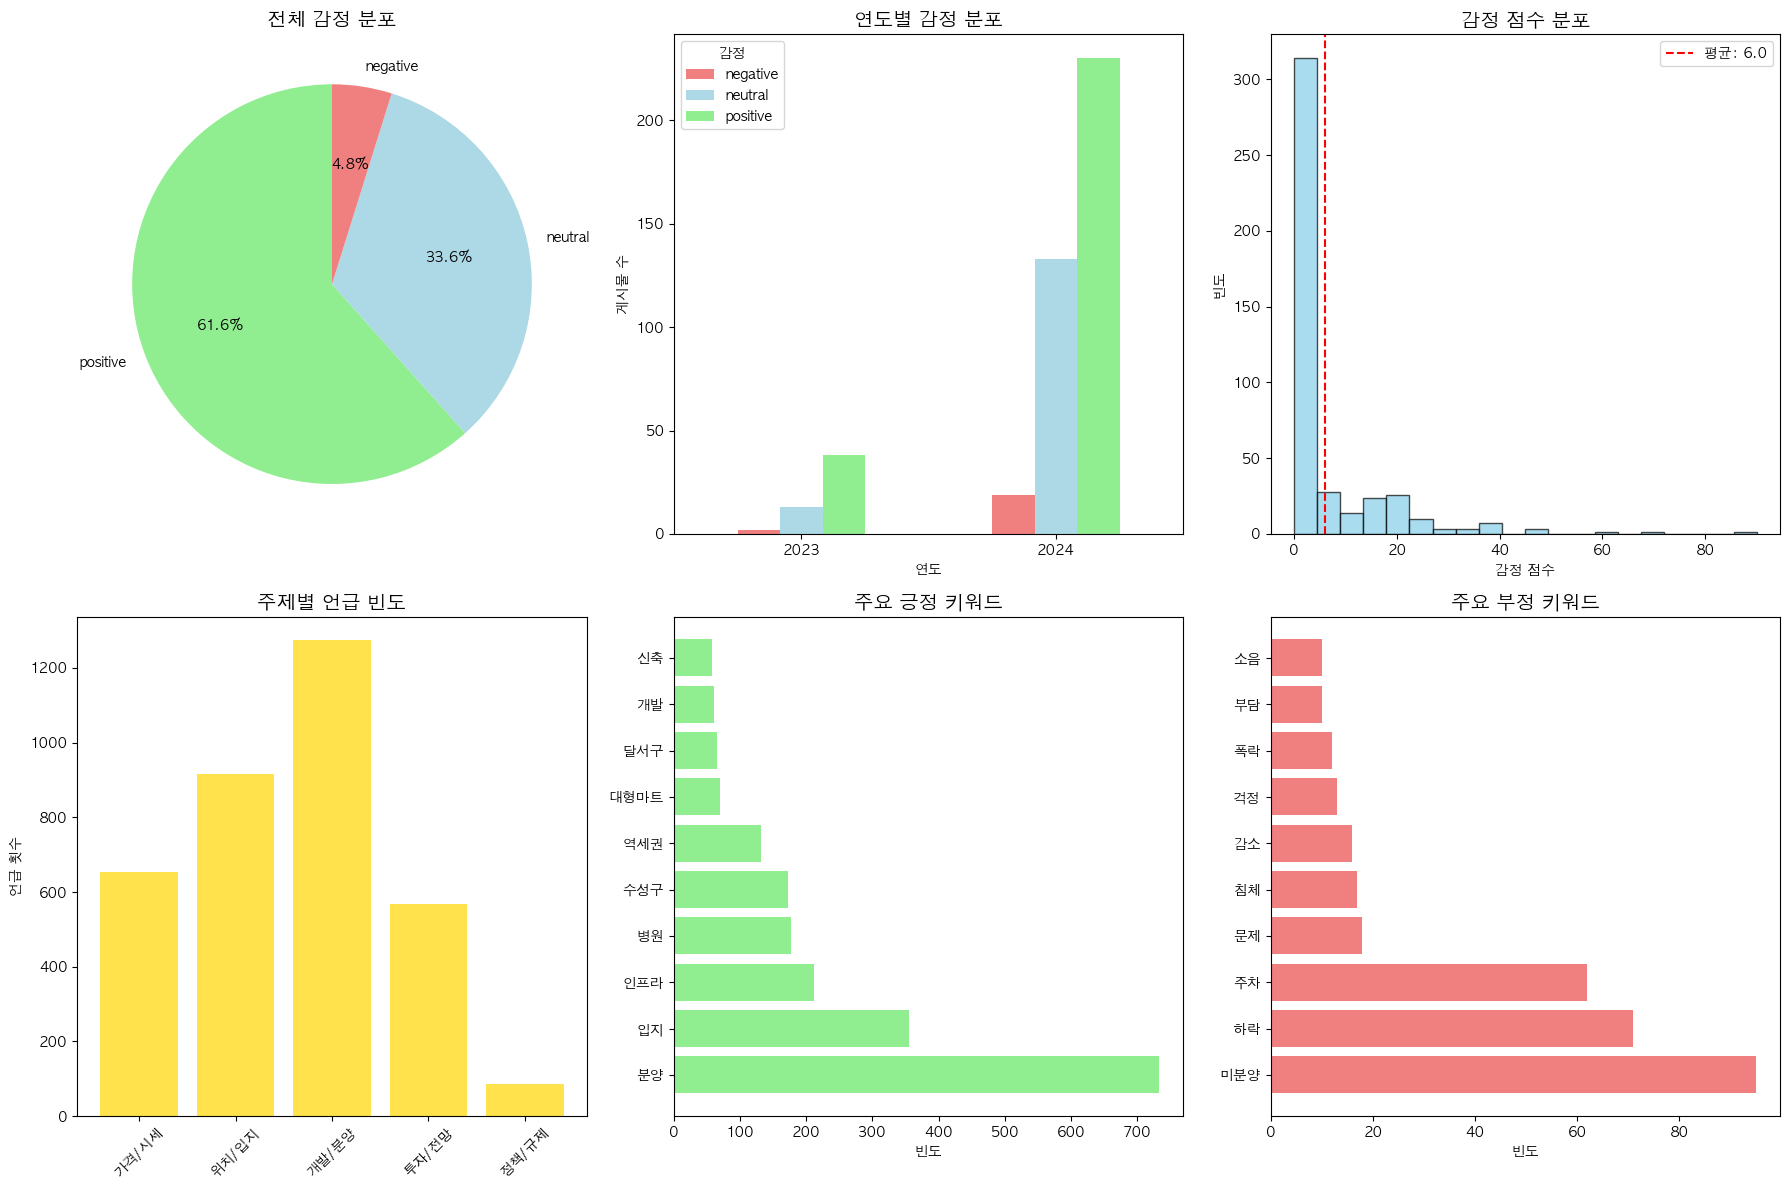


📋 감정별 게시물 샘플:

[😊 긍정 샘플]
제목: 신서동 혁신도시 최대, 최고급 단지  대보 디 하우스,  7천만원이면 거의 줍줍 아닌가요?...
감정 점수: 90
내용: 지역 오피스텔 시장이 갑갑하다지만, 이 정도 가격이면 투자 가치가 있지 않을까요? 공매로 취득한거라 이 가격이 가능한 듯. 거의 건축비 수준이네요. 관심 있으신 분 053 - 963 - 9633 대구지역 아파트 분양 시장 침체가 장기화되면서 파격 할인 분양을 통해 위기를 돌파하기 위한 시도가 일부 주택건설업체를 중심으로 단행되고 있어 관심을 모으고 있다. ...

[😟 부정 샘플]
제목: 자녀 부동산 종잣돈 마련 방법 : 초등학생이면 매달19만원이라도 증여하세요. [회계사케이]...
감정 점수: 7
내용: 회계사 케이 초등학생이면 매달19만원이라도 증여하세요. 자녀 부동산 종잣돈 마련 방법 자녀들이 성장하는 것은 생각보다 빠릅니다. 아장아장 걸을 때가 엊그제 같은데 금방 어른스러워지는 것을 보면 참 세월이 빠름을 느낍니다. 그러다가 어느 순간 자녀의 집을 걱정할 때가 슬슬 다가옵니다. 저도 이전 글에서 많이 적었고, 여기저기서 다들 많이 얘기 합니다. 세금 ...

[😐 중립 샘플]
제목: 대구시 월세...
감정 점수: 0
내용: 대구나 대구 근처 괜찮은 원룸 보통 보증금 월세 어느정도 할까요?...

✅ Step 5 완료: 감정 분석
분석 완료된 데이터: 435개
다음 단계: Step 6 - 워드클라우드 생성


In [10]:
# Step 5: 감정 분석 (정제된 데이터)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter, defaultdict

print("=" * 60)
print("💭 감정 분석 (정제된 데이터)")
print("=" * 60)

# 정제된 데이터 사용
if 'df_step4_cleaned' in locals():
    df_analysis = df_step4_cleaned.copy()
    print(f"정제된 데이터 사용: {len(df_analysis):,}개")
else:
    df_analysis = df_step4.copy()
    print(f"기본 데이터 사용: {len(df_analysis):,}개")

print(f"텍스트가 있는 게시물: {df_analysis['combined_text'].str.len().gt(10).sum():,}개")

# 부동산/대구 특화 감정 키워드 사전 구축
sentiment_keywords = {
    'positive': {
        # 일반적인 긍정 키워드
        '좋다', '만족', '추천', '괜찮다', '훌륭하다', '완벽하다', '최고', '우수하다', '훌륭',
        '안정', '성장', '발전', '개선', '향상', '증가', '상승', '호조', '회복',
        
        # 부동산 긍정 키워드
        '투자가치', '수익', '이익', '상승세', '호재', '개발', '신축', '리모델링', '분양',
        '교통편의', '입지', '학군', '인프라', '편의시설', '조용', '깨끗', '넓다', '쾌적',
        '전망', '조망', '채광', '통풍', '신도시', '역세권', '대형마트', '병원',
        
        # 대구 특화 긍정 키워드
        '수성구', '중구', '달서구', '지하철', '동대구역', '범어동', '신세계', '교육도시',
        '이월드', '83타워', '두류공원', '앞산', '의료도시', '경북대', '영남대'
    },
    
    'negative': {
        # 일반적인 부정 키워드
        '나쁘다', '최악', '실망', '불만', '화나다', '짜증', '걱정', '우려', '문제',
        '하락', '감소', '떨어지다', '부족', '어렵다', '힘들다', '불편', '시끄럽',
        
        # 부동산 부정 키워드  
        '손실', '비싸다', '부담', '거품', '폭락', '침체', '불안', '위험', '과열',
        '투기', '공급과잉', '미분양', '경매', '급매', '전세난', '깡통전세',
        '소음', '악취', '일조권', '조망권', '주차', '교통체증',
        
        # 대구 특화 부정 키워드
        '인구감소', '공동화', '침체', '낙후', '지방도시', '미세먼지', '도심공동화'
    },
    
    'neutral': {
        '보통', '그저그런', '평범', '일반적', '무난', '그럭저럭', '적당'
    }
}

# 대구 지역별 키워드 (감정 분석에 추가 가중치)
daegu_areas = {
    'premium': ['수성구', '범어동', '황금동', '중구', '동성로', '반월당'],
    'development': ['달서구', '성서', '북구', '칠곡', '동구'],
    'traditional': ['서구', '비산동', '내당동', '평리동']
}

# 부동산 관련 주제별 키워드
topic_keywords = {
    'price': ['가격', '시세', '매매가', '전세', '월세', '보증금', '억', '만원', '평당', '시세'],
    'location': ['위치', '입지', '역세권', '학군', '교통', '접근성', '거리', '도보'],
    'development': ['개발', '재개발', '재건축', '신축', '분양', '입주', '준공', '착공'],
    'investment': ['투자', '수익', '전망', '시장', '동향', '분석', '예측', '수익률'],
    'policy': ['정책', '규제', '대출', '금리', '세금', '취득세', '종부세', 'LTV', 'DTI']
}

def analyze_sentiment_enhanced(text):
    """향상된 감정 분석 (대구 지역 특화)"""
    if pd.isna(text) or len(str(text).strip()) < 10:
        return 'neutral', 0, {}, {}
    
    text = str(text).lower()
    
    # 기본 감정 점수 계산
    scores = {'positive': 0, 'negative': 0, 'neutral': 0}
    found_keywords = {'positive': [], 'negative': [], 'neutral': []}
    
    for sentiment, keywords in sentiment_keywords.items():
        for keyword in keywords:
            count = text.count(keyword)
            if count > 0:
                scores[sentiment] += count
                found_keywords[sentiment].extend([keyword] * count)
    
    # 대구 지역별 가중치 적용
    area_bonus = 0
    mentioned_areas = []
    for area_type, areas in daegu_areas.items():
        for area in areas:
            if area in text:
                mentioned_areas.append(area)
                if area_type == 'premium':
                    area_bonus += 2  # 프리미엄 지역은 긍정 가중치
                elif area_type == 'development':
                    area_bonus += 1  # 개발 지역은 약간 긍정
    
    scores['positive'] += area_bonus
    
    # 감정 결정
    total_positive = scores['positive']
    total_negative = scores['negative']
    
    if total_positive > total_negative:
        sentiment = 'positive'
        score = total_positive - total_negative
    elif total_negative > total_positive:
        sentiment = 'negative'  
        score = total_negative - total_positive
    else:
        sentiment = 'neutral'
        score = 0
    
    # 지역 정보 반환
    area_info = {
        'mentioned_areas': mentioned_areas,
        'area_bonus': area_bonus
    }
    
    return sentiment, score, found_keywords, area_info

def analyze_topics(text):
    """주제별 언급도 분석"""
    if pd.isna(text):
        return {}
    
    text = str(text).lower()
    topic_scores = {}
    
    for topic, keywords in topic_keywords.items():
        score = sum(text.count(keyword) for keyword in keywords)
        topic_scores[topic] = score
    
    return topic_scores

# 감정 분석 실행
print("\n🔍 향상된 감정 분석 실행 중...")

results = []
all_found_keywords = {'positive': [], 'negative': [], 'neutral': []}
all_topic_scores = defaultdict(int)
all_mentioned_areas = []

for idx, row in df_analysis.iterrows():
    text = row.get('combined_text', '') or row.get('cleaned_text', '') or row.get('text_content', '')
    
    # 감정 분석
    sentiment, score, found_keywords, area_info = analyze_sentiment_enhanced(text)
    
    # 주제 분석
    topic_scores = analyze_topics(text)
    
    # 결과 저장
    results.append({
        'index': idx,
        'sentiment': sentiment,
        'sentiment_score': score,
        'topic_scores': topic_scores,
        'mentioned_areas': area_info['mentioned_areas'],
        'area_bonus': area_info['area_bonus']
    })
    
    # 전체 키워드 및 주제 점수 누적
    for sent_type, keywords in found_keywords.items():
        all_found_keywords[sent_type].extend(keywords)
    
    for topic, score in topic_scores.items():
        all_topic_scores[topic] += score
        
    all_mentioned_areas.extend(area_info['mentioned_areas'])

# 결과를 DataFrame에 추가
df_step5 = df_analysis.copy()
df_step5['sentiment'] = [r['sentiment'] for r in results]
df_step5['sentiment_score'] = [r['sentiment_score'] for r in results]
df_step5['mentioned_areas'] = [r['mentioned_areas'] for r in results]

# 주제별 점수도 개별 컬럼으로 추가
for topic in topic_keywords.keys():
    df_step5[f'topic_{topic}'] = [r['topic_scores'].get(topic, 0) for r in results]

print(f"✅ 감정 분석 완료!")

# 결과 요약
print(f"\n📊 감정 분석 결과:")
sentiment_counts = df_step5['sentiment'].value_counts()
total_posts = len(df_step5)

for sentiment, count in sentiment_counts.items():
    percentage = count / total_posts * 100
    emoji = {'positive': '😊', 'negative': '😟', 'neutral': '😐'}.get(sentiment, '')
    print(f"  {emoji} {sentiment}: {count:,}개 ({percentage:.1f}%)")

print(f"\n📈 주제별 언급 빈도:")
sorted_topics = sorted(all_topic_scores.items(), key=lambda x: x[1], reverse=True)
for topic, score in sorted_topics:
    topic_name = {
        'price': '💰 가격/시세',
        'location': '📍 위치/입지', 
        'development': '🏗️ 개발/분양',
        'investment': '📈 투자/전망',
        'policy': '📋 정책/규제'
    }.get(topic, topic)
    print(f"  {topic_name}: {score:,}회 언급")

# 대구 지역별 언급 분석
print(f"\n🏙️ 대구 지역별 언급:")
area_counts = Counter(all_mentioned_areas)
if area_counts:
    for area, count in area_counts.most_common(10):
        print(f"  {area}: {count}회 언급")
else:
    print("  지역명 언급이 적습니다.")

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. 감정 분포 파이차트
sentiment_counts = df_step5['sentiment'].value_counts()
colors = {'positive': 'lightgreen', 'negative': 'lightcoral', 'neutral': 'lightblue'}
pie_colors = [colors.get(sent, 'gray') for sent in sentiment_counts.index]

axes[0,0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
              colors=pie_colors, startangle=90)
axes[0,0].set_title('전체 감정 분포', fontsize=14)

# 2. 연도별 감정 분포
if 'year' in df_step5.columns:
    yearly_sentiment = pd.crosstab(df_step5['year'], df_step5['sentiment'])
    yearly_sentiment.plot(kind='bar', ax=axes[0,1], color=['lightcoral', 'lightblue', 'lightgreen'])
    axes[0,1].set_title('연도별 감정 분포', fontsize=14)
    axes[0,1].set_xlabel('연도')
    axes[0,1].set_ylabel('게시물 수')
    axes[0,1].legend(title='감정')
    axes[0,1].tick_params(axis='x', rotation=0)
else:
    axes[0,1].text(0.5, 0.5, '연도 정보 없음', ha='center', va='center')
    axes[0,1].set_title('연도별 감정 분포', fontsize=14)

# 3. 감정 점수 분포
sentiment_scores = df_step5['sentiment_score']
axes[0,2].hist(sentiment_scores, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,2].axvline(sentiment_scores.mean(), color='red', linestyle='--', 
                  label=f'평균: {sentiment_scores.mean():.1f}')
axes[0,2].set_title('감정 점수 분포', fontsize=14)
axes[0,2].set_xlabel('감정 점수')
axes[0,2].set_ylabel('빈도')
axes[0,2].legend()

# 4. 주제별 언급 빈도
topic_names = ['가격/시세', '위치/입지', '개발/분양', '투자/전망', '정책/규제']
topic_scores_list = [all_topic_scores[topic] for topic in topic_keywords.keys()]

axes[1,0].bar(topic_names, topic_scores_list, color='gold', alpha=0.7)
axes[1,0].set_title('주제별 언급 빈도', fontsize=14)
axes[1,0].set_ylabel('언급 횟수')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. 긍정 키워드 Top 10
top_positive = Counter(all_found_keywords['positive']).most_common(10)
if top_positive:
    pos_words, pos_counts = zip(*top_positive)
    axes[1,1].barh(range(len(pos_words)), pos_counts, color='lightgreen')
    axes[1,1].set_yticks(range(len(pos_words)))
    axes[1,1].set_yticklabels(pos_words)
    axes[1,1].set_title('주요 긍정 키워드', fontsize=14)
    axes[1,1].set_xlabel('빈도')
else:
    axes[1,1].text(0.5, 0.5, '긍정 키워드 없음', ha='center', va='center')
    axes[1,1].set_title('주요 긍정 키워드', fontsize=14)

# 6. 부정 키워드 Top 10
top_negative = Counter(all_found_keywords['negative']).most_common(10)
if top_negative:
    neg_words, neg_counts = zip(*top_negative)
    axes[1,2].barh(range(len(neg_words)), neg_counts, color='lightcoral')
    axes[1,2].set_yticks(range(len(neg_words)))
    axes[1,2].set_yticklabels(neg_words)
    axes[1,2].set_title('주요 부정 키워드', fontsize=14)
    axes[1,2].set_xlabel('빈도')
else:
    axes[1,2].text(0.5, 0.5, '부정 키워드 없음', ha='center', va='center')
    axes[1,2].set_title('주요 부정 키워드', fontsize=14)

plt.tight_layout()
plt.show()

# 감정별 게시물 샘플
print(f"\n📋 감정별 게시물 샘플:")
print("=" * 60)

for sentiment in ['positive', 'negative', 'neutral']:
    sentiment_posts = df_step5[df_step5['sentiment'] == sentiment]
    if len(sentiment_posts) > 0:
        # 감정 점수가 높은 순으로 정렬해서 대표적인 샘플 선택
        top_sample = sentiment_posts.nlargest(1, 'sentiment_score').iloc[0]
        
        sentiment_names = {
            'positive': '😊 긍정',
            'negative': '😟 부정', 
            'neutral': '😐 중립'
        }
        
        print(f"\n[{sentiment_names[sentiment]} 샘플]")
        print(f"제목: {top_sample['title'][:60]}...")
        print(f"감정 점수: {top_sample['sentiment_score']}")
        
        # 텍스트 선택 (cleaned_text > combined_text > text_content 순)
        sample_text = ""
        for col in ['cleaned_text', 'combined_text', 'text_content']:
            if col in top_sample and pd.notna(top_sample[col]):
                sample_text = str(top_sample[col])
                break
        
        if sample_text:
            content = sample_text[:200].replace('\n', ' ')
            print(f"내용: {content}...")
        
        if top_sample['mentioned_areas']:
            print(f"언급 지역: {', '.join(top_sample['mentioned_areas'])}")

print(f"\n✅ Step 5 완료: 감정 분석")
print(f"분석 완료된 데이터: {len(df_step5):,}개")
print(f"다음 단계: Step 6 - 워드클라우드 생성")

☁️ 워드클라우드 생성
✅ WordCloud 라이브러리 사용 가능
감정 분석 완료된 데이터 사용: 435개

📝 사용할 텍스트 컬럼: cleaned_text

☁️ 전체 워드클라우드 생성 중...
📊 전체 단어 통계:
  총 단어 수: 38,265개
  고유 단어 수: 10,822개
  상위 키워드:
    년차: 2409회
    주상복합: 718회
    분양권: 300회
    단지: 273회
    리얼랭커스: 266회
    입지: 258회
    우선: 210회
    교육: 199회
    편한세상: 198회
    인프라: 195회

😊 감정별 워드클라우드 텍스트 준비 중...
📊 Positive 감정 단어 통계:
  총 단어 수: 33,943개
  고유 단어 수: 9,044개
  상위 키워드:
    년차: 2409회
    주상복합: 717회
    분양권: 300회
    단지: 271회
    리얼랭커스: 266회
    입지: 258회
    우선: 209회
    교육: 199회
    인프라: 195회
    편한세상: 195회
📊 Negative 감정 단어 통계:
  총 단어 수: 1,683개
  고유 단어 수: 1,096개
  상위 키워드:
    재생: 28회
    음소거: 12회
    자막: 12회
    매달: 10회
    만원: 10회
    대장: 10회
    됩니다: 8회
    있습니다: 8회
    인허가: 8회
    설정: 8회
📊 Neutral 감정 단어 통계:
  총 단어 수: 2,639개
  고유 단어 수: 1,780개
  상위 키워드:
    순위: 41회
    전체: 33회
    구별: 33회
    모든: 30회
    대구시: 29회
    신고가: 29회
    백억향: 22회
    아라아리: 22회
    신규: 19회
    하네요: 13회

📅 연도별 워드클라우드 텍스트 준비 중...
📊 2023년 단어 통계:
  총 단어 수: 2,347개
  고유 단어 수: 1,256개
  상위

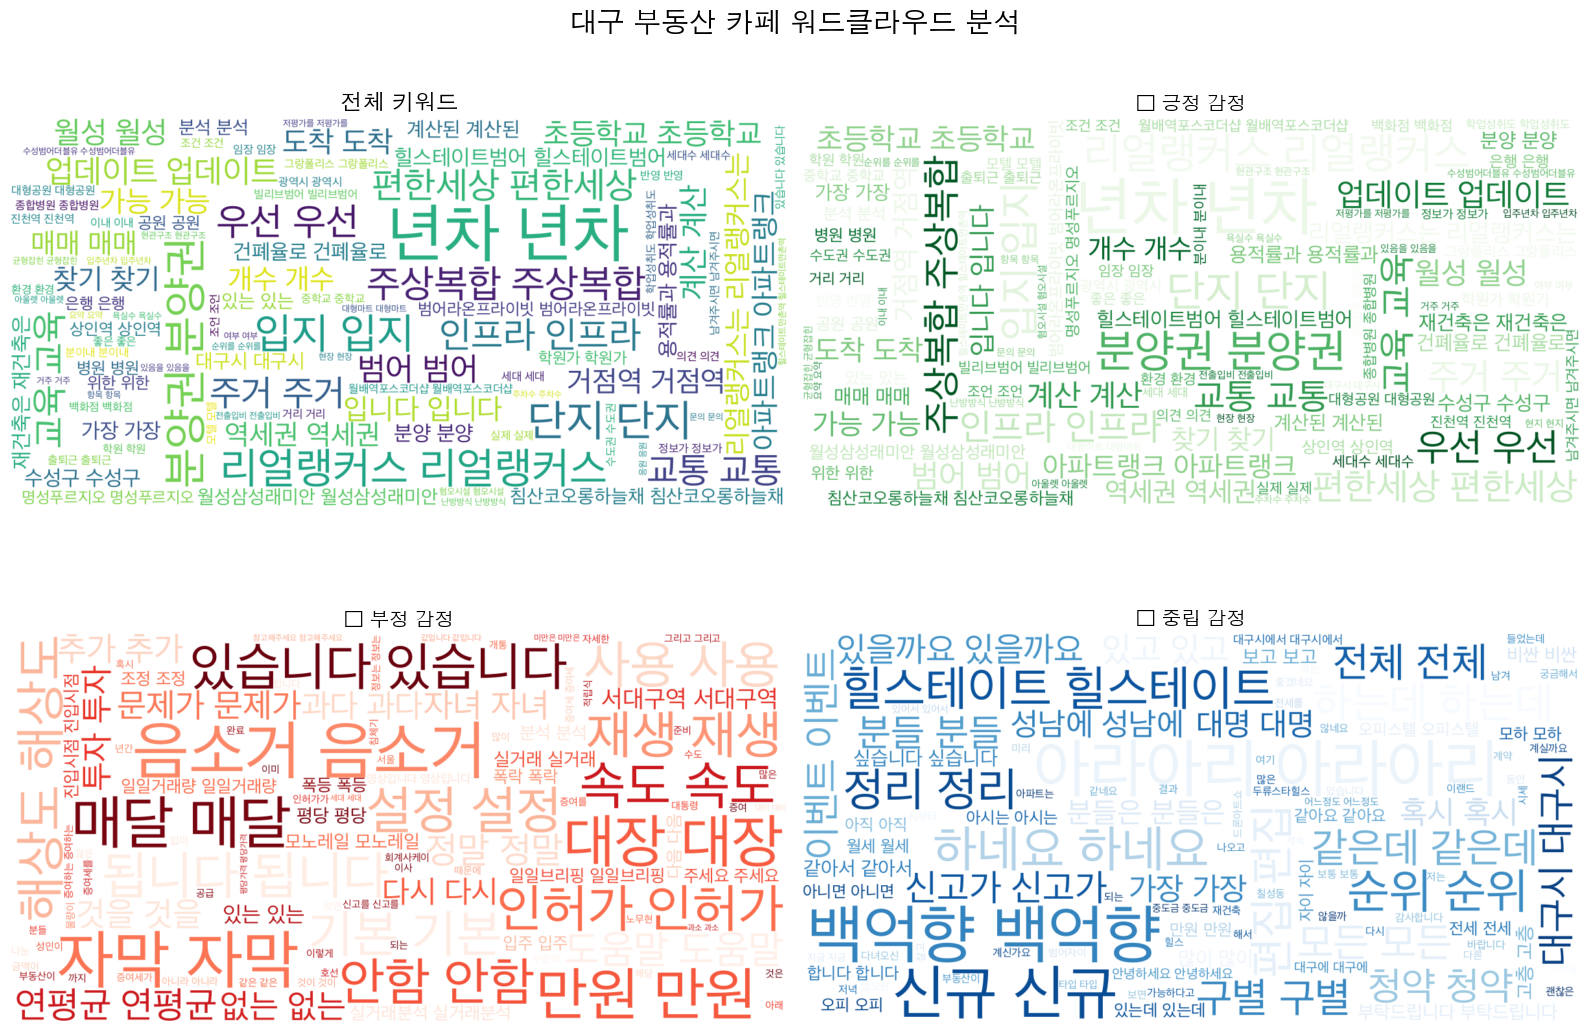

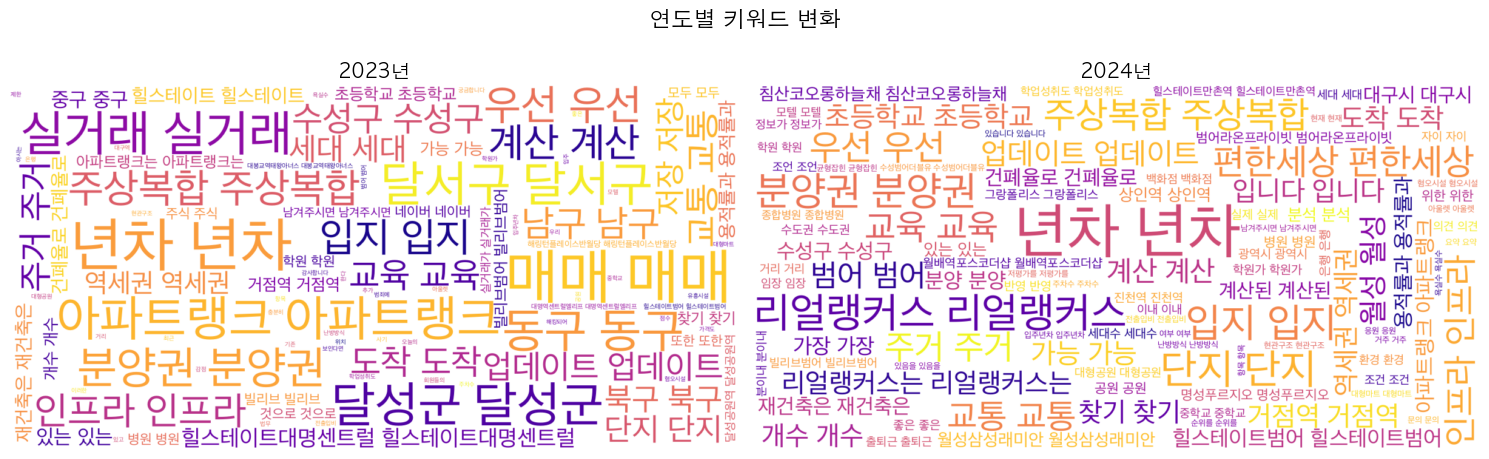


📋 최종 분석 요약
✅ 전체 분석 완료!
  📊 최종 데이터: 435개 게시물
  💭 감정 분석:
    😊 positive: 268개 (61.6%)
    😐 neutral: 146개 (33.6%)
    😟 negative: 21개 (4.8%)
  📅 연도별 분포:
    2023년: 53개
    2024년: 382개

🎉 대구 부동산 카페 여론 분석이 완료되었습니다!
이 분석을 통해 다음을 파악할 수 있습니다:
  • 대구 부동산 시장에 대한 전반적인 감정
  • 주요 관심사 및 핫한 키워드
  • 시간대별 여론 변화
  • 지역별 관심도


In [12]:
# Step 6: 워드클라우드 생성
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
import numpy as np

print("=" * 60)
print("☁️ 워드클라우드 생성")
print("=" * 60)

# WordCloud 라이브러리 확인 및 설치 안내
try:
    from wordcloud import WordCloud
    print("✅ WordCloud 라이브러리 사용 가능")
    wordcloud_available = True
except ImportError:
    print("❌ WordCloud 라이브러리 설치 필요")
    print("설치 명령어: pip install wordcloud")
    wordcloud_available = False

# 데이터 준비
if 'df_step5' in locals():
    df_final = df_step5.copy()
    print(f"감정 분석 완료된 데이터 사용: {len(df_final):,}개")
else:
    df_final = df_step4.copy()
    print(f"기본 데이터 사용: {len(df_final):,}개")

# 부동산/대구 특화 불용어 정의
stopwords = {
    # 일반 불용어
    '이', '그', '저', '것', '들', '에', '를', '은', '는', '이다', '있다', '하다',
    '되다', '같다', '보다', '아니다', '없다', '많다', '크다', '작다', '새롭다',
    '좋다', '나쁘다', '높다', '낮다', '빠르다', '느리다', '쉽다', '어렵다',
    '수', '개', '등', '및', '또', '더', '그런', '이런', '저런', '어떤',
    '누구', '언제', '어디', '어떻게', '왜', '그래서', '그러나', '하지만',
    '때문', '위해', '통해', '따라', '만큼', '정도', '가지', '경우',
    
    # 부동산 일반 불용어 (너무 일반적인 용어)
    '아파트', '집', '부동산', '집값', '주택', '건물', '매물',
    '게시판', '카페', '글', '댓글', '질문', '답변', '정보', '내용',
    '분', '시간', '일', '월', '년', '오늘', '어제', '내일',
    
    # 대구 일반 불용어 (너무 포괄적인 지역명)
    '대구', '시', '구', '동', '지역', '곳', '장소', '근처', '주변',
    
    # 기타 불용어
    '사람', '생각', '말', '이야기', '얘기', '보기', '느낌', '기분'
}

def extract_meaningful_words(text, min_length=2, max_length=10):
    """의미있는 단어만 추출"""
    if pd.isna(text):
        return []
    
    text = str(text)
    
    # 한글 단어만 추출
    korean_words = re.findall(r'[가-힣]+', text)
    
    # 길이 필터링 및 불용어 제거
    meaningful_words = []
    for word in korean_words:
        if (min_length <= len(word) <= max_length and 
            word not in stopwords and
            not word.isdigit()):
            meaningful_words.append(word)
    
    return meaningful_words

def create_text_for_wordcloud(df, text_column, title="전체"):
    """워드클라우드용 텍스트 생성"""
    all_words = []
    
    for text in df[text_column].dropna():
        words = extract_meaningful_words(text)
        all_words.extend(words)
    
    if not all_words:
        print(f"⚠️  {title}: 추출된 단어가 없습니다.")
        return ""
    
    # 단어 빈도 계산
    word_counts = Counter(all_words)
    
    # 너무 자주 나오는 단어는 제한 (상위 1% 이상은 빈도 조정)
    total_words = len(all_words)
    top_threshold = total_words * 0.01  # 1% 이상
    
    adjusted_words = []
    for word, count in word_counts.items():
        if count > top_threshold:
            # 너무 자주 나오는 단어는 빈도를 줄임
            adjusted_count = max(1, int(count * 0.3))
            adjusted_words.extend([word] * adjusted_count)
        else:
            adjusted_words.extend([word] * count)
    
    print(f"📊 {title} 단어 통계:")
    print(f"  총 단어 수: {len(all_words):,}개")
    print(f"  고유 단어 수: {len(word_counts):,}개")
    
    # 상위 키워드 출력
    top_words = word_counts.most_common(10)
    print(f"  상위 키워드:")
    for word, count in top_words:
        print(f"    {word}: {count}회")
    
    return ' '.join(adjusted_words)

# 워드클라우드 생성 함수
def generate_wordcloud(text, title, color_scheme='viridis'):
    """워드클라우드 생성"""
    if not wordcloud_available:
        print(f"❌ {title}: WordCloud 라이브러리가 없어 생성할 수 없습니다.")
        return None
    
    if not text or len(text.strip()) < 10:
        print(f"⚠️  {title}: 텍스트가 부족합니다.")
        return None
    
    try:
        # Mac 환경에서 한글 폰트 찾기
        font_paths = [
            '/Library/Fonts/AppleGothic.ttf',  # Mac 기본
            '/System/Library/Fonts/AppleSDGothicNeo.ttc',  # Mac 시스템
            '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # Linux
            'C:/Windows/Fonts/malgun.ttf',  # Windows
            'malgun.ttf',  # 현재 폴더
            'NanumGothic.ttf'  # 현재 폴더
        ]
        
        font_path = None
        for path in font_paths:
            try:
                import os
                if os.path.exists(path):
                    font_path = path
                    break
            except:
                continue
        
        # WordCloud 생성
        wordcloud = WordCloud(
            font_path=font_path,
            background_color='white',
            width=1200,
            height=600,
            max_words=100,
            colormap=color_scheme,
            relative_scaling=0.5,
            min_font_size=10,
            max_font_size=100
        ).generate(text)
        
        return wordcloud
    
    except Exception as e:
        print(f"❌ {title} 워드클라우드 생성 오류: {e}")
        return None

# 텍스트 컬럼 선택
text_column = 'combined_text'
if 'cleaned_text' in df_final.columns:
    text_column = 'cleaned_text'

print(f"\n📝 사용할 텍스트 컬럼: {text_column}")

# 1. 전체 워드클라우드
print(f"\n☁️ 전체 워드클라우드 생성 중...")
all_text = create_text_for_wordcloud(df_final, text_column, "전체")

# 2. 감정별 워드클라우드 텍스트 준비
sentiment_texts = {}
if 'sentiment' in df_final.columns:
    print(f"\n😊 감정별 워드클라우드 텍스트 준비 중...")
    for sentiment in ['positive', 'negative', 'neutral']:
        sentiment_df = df_final[df_final['sentiment'] == sentiment]
        if len(sentiment_df) > 0:
            sentiment_text = create_text_for_wordcloud(
                sentiment_df, text_column, 
                f"{sentiment.capitalize()} 감정"
            )
            sentiment_texts[sentiment] = sentiment_text

# 3. 연도별 워드클라우드 텍스트 준비
year_texts = {}
if 'year' in df_final.columns:
    print(f"\n📅 연도별 워드클라우드 텍스트 준비 중...")
    for year in sorted(df_final['year'].unique()):
        year_df = df_final[df_final['year'] == year]
        if len(year_df) > 10:  # 최소 10개 이상인 연도만
            year_text = create_text_for_wordcloud(
                year_df, text_column, 
                f"{year}년"
            )
            year_texts[year] = year_text

# 워드클라우드 시각화
if wordcloud_available:
    # 전체 + 감정별 (2x2 레이아웃)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. 전체 워드클라우드
    wordcloud_all = generate_wordcloud(all_text, "전체", 'viridis')
    if wordcloud_all:
        axes[0,0].imshow(wordcloud_all, interpolation='bilinear')
        axes[0,0].axis('off')
        axes[0,0].set_title('전체 키워드', fontsize=16, fontweight='bold')
    else:
        axes[0,0].text(0.5, 0.5, '전체 워드클라우드\n생성 실패', 
                       ha='center', va='center', fontsize=14)
        axes[0,0].set_title('전체 키워드', fontsize=16)
        axes[0,0].axis('off')
    
    # 2-4. 감정별 워드클라우드
    sentiment_info = [
        ('positive', '😊 긍정 감정', 'Greens'),
        ('negative', '😟 부정 감정', 'Reds'),
        ('neutral', '😐 중립 감정', 'Blues')
    ]
    
    for i, (sentiment, title, color) in enumerate(sentiment_info):
        row, col = (0, 1) if i == 0 else (1, i-1)
        
        if sentiment in sentiment_texts and sentiment_texts[sentiment]:
            wordcloud_sent = generate_wordcloud(sentiment_texts[sentiment], title, color)
            if wordcloud_sent:
                axes[row, col].imshow(wordcloud_sent, interpolation='bilinear')
                axes[row, col].axis('off')
                axes[row, col].set_title(title, fontsize=14, fontweight='bold')
            else:
                axes[row, col].text(0.5, 0.5, f'{title}\n생성 실패', 
                                   ha='center', va='center', fontsize=12)
                axes[row, col].set_title(title, fontsize=14)
                axes[row, col].axis('off')
        else:
            axes[row, col].text(0.5, 0.5, f'{title}\n데이터 부족', 
                               ha='center', va='center', fontsize=12)
            axes[row, col].set_title(title, fontsize=14)
            axes[row, col].axis('off')
    
    plt.suptitle('대구 부동산 카페 워드클라우드 분석', fontsize=20, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.show()
    
    # 연도별 워드클라우드 (별도)
    if year_texts:
        years = list(year_texts.keys())
        n_years = len(years)
        
        if n_years > 0:
            fig, axes = plt.subplots(1, min(n_years, 3), figsize=(15, 5))
            if n_years == 1:
                axes = [axes]
            
            for i, year in enumerate(years[:3]):  # 최대 3개년
                if year_texts[year]:
                    wordcloud_year = generate_wordcloud(year_texts[year], f"{year}년", 'plasma')
                    if wordcloud_year:
                        axes[i].imshow(wordcloud_year, interpolation='bilinear')
                        axes[i].axis('off')
                        axes[i].set_title(f'{year}년', fontsize=14, fontweight='bold')
                    else:
                        axes[i].text(0.5, 0.5, f'{year}년\n생성 실패', 
                                   ha='center', va='center', fontsize=12)
                        axes[i].set_title(f'{year}년', fontsize=14)
                        axes[i].axis('off')
            
            plt.suptitle('연도별 키워드 변화', fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.show()

else:
    # WordCloud 라이브러리가 없는 경우 텍스트 기반 분석만 제공
    print("\n📊 텍스트 기반 키워드 분석 (WordCloud 대체):")
    
    if all_text:
        all_words = all_text.split()
        word_counts = Counter(all_words)
        
        print(f"\n🔤 전체 상위 키워드 (Top 20):")
        for i, (word, count) in enumerate(word_counts.most_common(20), 1):
            print(f"  {i:2d}. {word}: {count}회")

# 최종 분석 요약
print(f"\n" + "=" * 60)
print("📋 최종 분석 요약")
print("=" * 60)

print(f"✅ 전체 분석 완료!")
print(f"  📊 최종 데이터: {len(df_final):,}개 게시물")

if 'sentiment' in df_final.columns:
    sentiment_summary = df_final['sentiment'].value_counts()
    print(f"  💭 감정 분석:")
    for sentiment, count in sentiment_summary.items():
        emoji = {'positive': '😊', 'negative': '😟', 'neutral': '😐'}.get(sentiment, '')
        percentage = count / len(df_final) * 100
        print(f"    {emoji} {sentiment}: {count}개 ({percentage:.1f}%)")

if 'year' in df_final.columns:
    year_summary = df_final['year'].value_counts().sort_index()
    print(f"  📅 연도별 분포:")
    for year, count in year_summary.items():
        print(f"    {year}년: {count}개")

print(f"\n🎉 대구 부동산 카페 여론 분석이 완료되었습니다!")
print(f"이 분석을 통해 다음을 파악할 수 있습니다:")
print(f"  • 대구 부동산 시장에 대한 전반적인 감정")
print(f"  • 주요 관심사 및 핫한 키워드")  
print(f"  • 시간대별 여론 변화")
print(f"  • 지역별 관심도")

☁️ 개선된 워드클라우드 생성
✅ WordCloud 라이브러리 사용 가능
분석 대상 데이터: 435개

📝 사용할 텍스트 컬럼: cleaned_text

📊 텍스트 분석 중...
전체 고유 단어: 3286개
positive 감정 단어: 8895개
negative 감정 단어: 1071개
neutral 감정 단어: 1754개

🔤 전체 상위 키워드 (Top 15):
   1. 년차: 2409회
   2. 주상복합: 718회
   3. 분양권: 300회
   4. 단지: 273회
   5. 리얼랭커스: 266회
   6. 입지: 258회
   7. 우선: 210회
   8. 교육: 199회
   9. 편한세상: 198회
  10. 인프라: 195회
  11. 교통: 187회
  12. 주거: 186회
  13. 범어: 148회
  14. 업데이트: 148회
  15. 계산: 137회

☁️ 워드클라우드 생성 중...


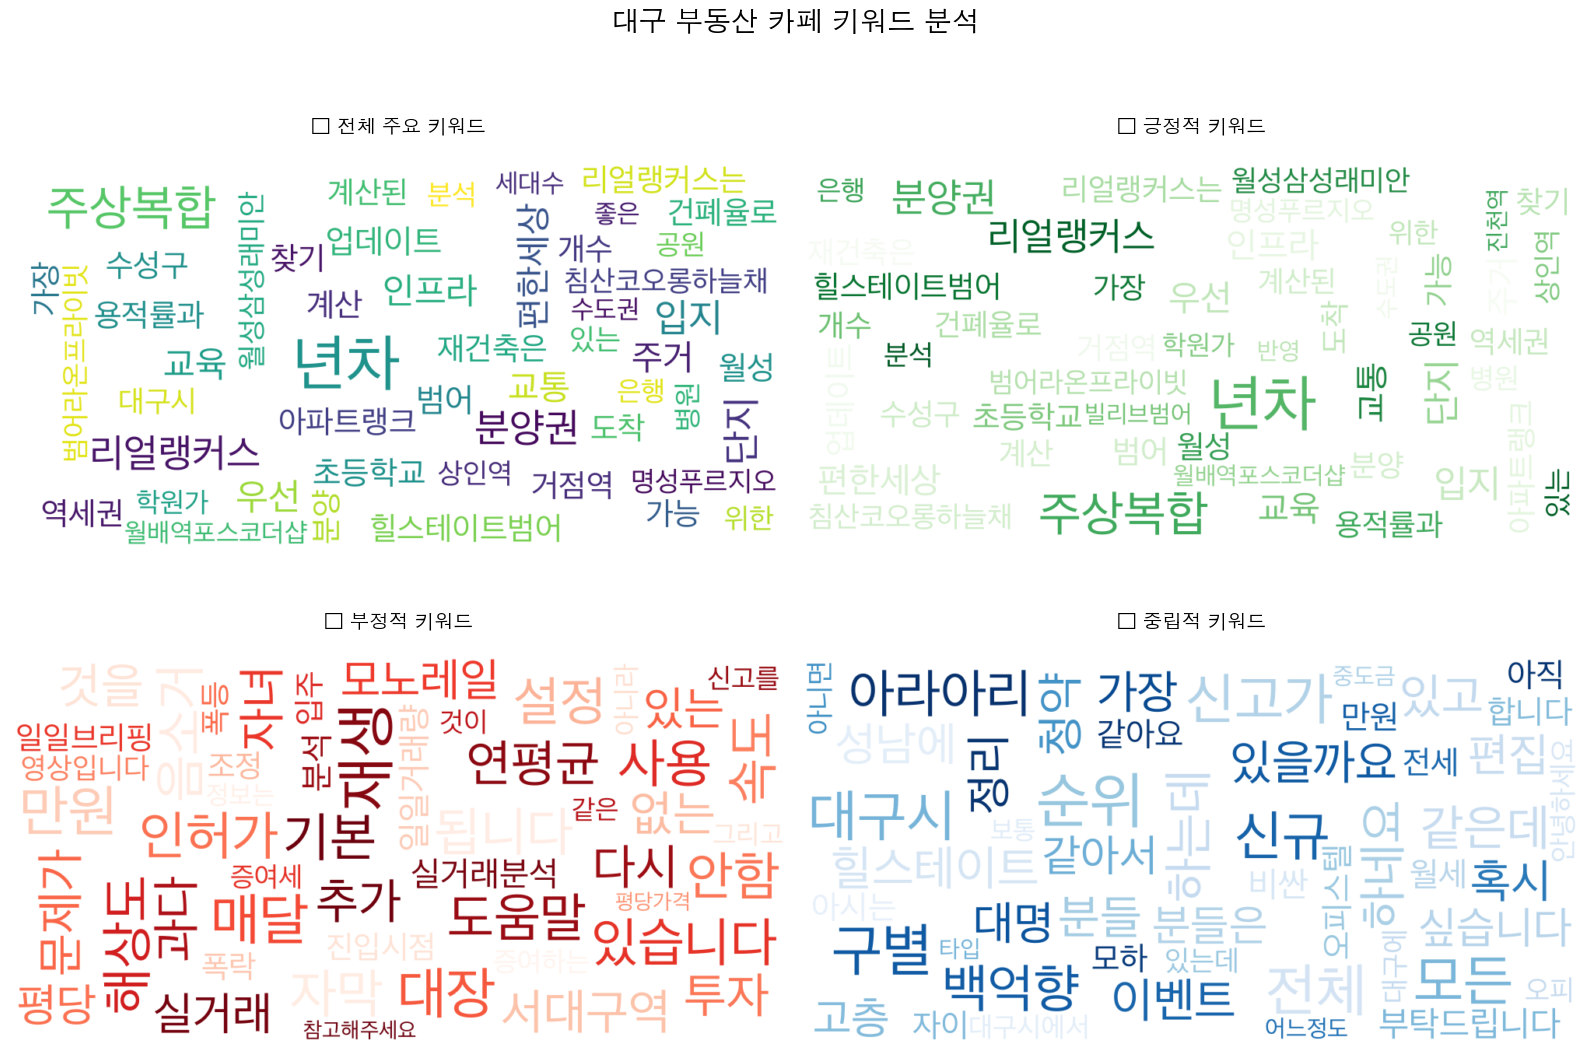


📊 감정별 상위 키워드 비교:

😊 긍정적 키워드:
  1. 년차 (2409회)
  2. 주상복합 (717회)
  3. 분양권 (300회)
  4. 단지 (271회)
  5. 리얼랭커스 (266회)
  6. 입지 (258회)
  7. 우선 (209회)
  8. 교육 (199회)

😟 부정적 키워드:
  1. 재생 (28회)
  2. 음소거 (12회)
  3. 자막 (12회)
  4. 매달 (10회)
  5. 만원 (10회)
  6. 대장 (10회)
  7. 됩니다 (8회)
  8. 있습니다 (8회)

😐 중립적 키워드:
  1. 순위 (41회)
  2. 전체 (33회)
  3. 구별 (33회)
  4. 모든 (30회)
  5. 대구시 (29회)
  6. 신고가 (29회)
  7. 백억향 (22회)
  8. 아라아리 (22회)

🎯 분석 완료!
✅ 대구 부동산 카페 여론 분석이 성공적으로 완료되었습니다!
📈 이 분석을 통해 확인할 수 있는 것들:
  • 대구 부동산 시장 관련 주요 관심사
  • 긍정적/부정적 감정과 연관된 키워드
  • 실제 부동산 거래/투자 관련 생생한 여론
  • 지역별, 시기별 관심도 변화


In [14]:
# Step 6 (개선): 깔끔한 워드클라우드
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
import numpy as np

print("=" * 60)
print("☁️ 개선된 워드클라우드 생성")
print("=" * 60)

# WordCloud 라이브러리 확인
try:
    from wordcloud import WordCloud
    print("✅ WordCloud 라이브러리 사용 가능")
    wordcloud_available = True
except ImportError:
    print("❌ WordCloud 라이브러리 설치 필요: pip install wordcloud")
    wordcloud_available = False

# 데이터 준비
if 'df_step5' in locals():
    df_final = df_step5.copy()
else:
    df_final = df_step4.copy()

print(f"분석 대상 데이터: {len(df_final):,}개")

# 확장된 불용어 리스트 (중복 방지)
comprehensive_stopwords = {
    # 기본 조사, 어미
    '이', '그', '저', '것', '들', '에', '를', '은', '는', '이다', '있다', '하다',
    '되다', '같다', '보다', '아니다', '없다', '많다', '크다', '작다', '새롭다',
    '좋다', '나쁘다', '높다', '낮다', '빠르다', '느리다', '쉽다', '어렵다',
    '수', '개', '등', '및', '또', '더', '그런', '이런', '저런', '어떤',
    '누구', '언제', '어디', '어떻게', '왜', '그래서', '그러나', '하지만',
    '때문', '위해', '통해', '따라', '만큼', '정도', '가지', '경우',
    '거나', '거든', '거지', '겠다', '네요', '니다', '입니다', '습니다',
    
    # 부동산 일반어 (너무 포괄적)
    '아파트', '집', '부동산', '주택', '건물', '매물', '방', '화장실',
    '베란다', '거실', '주방', '침실', '평', '층', '동', '호',
    
    # 카페/게시판 관련
    '게시판', '카페', '글', '댓글', '질문', '답변', '정보', '내용',
    '회원', '가입', '등록', '올려', '올린', '쓴', '썼', '봤', '보고',
    '말씀', '드려', '주세요', '감사', '고맙', '죄송',
    
    # 시간 관련
    '분', '시간', '일', '월', '년', '오늘', '어제', '내일', '이번',
    '지난', '다음', '요즘', '최근', '현재', '지금', '당시',
    
    # 대구 일반어 (너무 포괄적)
    '대구', '시', '구', '동', '지역', '곳', '장소', '근처', '주변',
    '여기', '저기', '거기', '어디', '위치',
    
    # 기타 일반어
    '사람', '생각', '말', '이야기', '얘기', '보기', '느낌', '기분',
    '정말', '진짜', '완전', '엄청', '너무', '많이', '조금', '약간',
    '그냥', '막', '좀', '좀더', '더욱', '훨씬', '별로', '전혀'
}

def clean_and_extract_words(text, min_length=2, max_length=8):
    """텍스트에서 의미있는 단어만 깔끔하게 추출"""
    if pd.isna(text):
        return []
    
    text = str(text).lower()
    
    # 1차: 한글만 추출 (더 정확한 패턴)
    korean_words = re.findall(r'[가-힣]{2,}', text)
    
    # 2차: 불용어 및 길이 필터링
    filtered_words = []
    for word in korean_words:
        # 길이 체크
        if not (min_length <= len(word) <= max_length):
            continue
            
        # 불용어 체크
        if word in comprehensive_stopwords:
            continue
            
        # 숫자만 있는 단어 제외
        if word.isdigit():
            continue
            
        # 반복되는 글자만 있는 단어 제외 (예: "ㅋㅋㅋ", "ㅠㅠㅠ")
        if len(set(word)) == 1:
            continue
            
        # 특정 패턴 제외
        skip_patterns = [
            r'^ㅋ+$', r'^ㅎ+$', r'^ㅠ+$', r'^ㅜ+$',  # 감탄사
            r'하하+', r'헤헤+', r'히히+',  # 웃음
        ]
        
        skip = False
        for pattern in skip_patterns:
            if re.match(pattern, word):
                skip = True
                break
        
        if skip:
            continue
            
        filtered_words.append(word)
    
    return filtered_words

def create_clean_wordcloud_text(df, text_column, min_freq=2):
    """중복 없는 깔끔한 워드클라우드 텍스트 생성"""
    all_words = []
    
    # 모든 텍스트에서 단어 추출
    for text in df[text_column].dropna():
        words = clean_and_extract_words(text)
        all_words.extend(words)
    
    if not all_words:
        return "", {}
    
    # 단어 빈도 계산
    word_counts = Counter(all_words)
    
    # 최소 빈도 이상인 단어만 선택
    filtered_counts = {word: count for word, count in word_counts.items() 
                      if count >= min_freq}
    
    if not filtered_counts:
        return "", {}
    
    # 빈도 기반 가중치 텍스트 생성 (중복 제거)
    weighted_words = []
    for word, count in filtered_counts.items():
        # 너무 자주 나오는 단어는 빈도를 조정
        if count > 20:
            adjusted_count = int(count * 0.5)  # 50% 감소
        elif count > 10:
            adjusted_count = int(count * 0.7)  # 30% 감소
        else:
            adjusted_count = count
        
        # 최소 1번은 포함
        adjusted_count = max(1, adjusted_count)
        weighted_words.extend([word] * adjusted_count)
    
    return ' '.join(weighted_words), filtered_counts

def generate_clean_wordcloud(text, title, colormap='viridis'):
    """깔끔한 워드클라우드 생성"""
    if not wordcloud_available or not text:
        return None
    
    try:
        # 한글 폰트 경로 찾기
        import os
        font_paths = [
            '/System/Library/Fonts/AppleSDGothicNeo.ttc',  # Mac
            '/Library/Fonts/AppleGothic.ttf',  # Mac 기본
            'C:/Windows/Fonts/malgun.ttf',  # Windows
            '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Linux
        ]
        
        font_path = None
        for path in font_paths:
            if os.path.exists(path):
                font_path = path
                break
        
        # 워드클라우드 설정 (개선된 파라미터)
        wordcloud = WordCloud(
            font_path=font_path,
            background_color='white',
            width=1000,
            height=500,
            max_words=50,  # 단어 수 제한
            colormap=colormap,
            relative_scaling=0.3,  # 크기 차이 줄임
            min_font_size=15,  # 최소 글자 크기 증가
            max_font_size=80,  # 최대 글자 크기 제한
            prefer_horizontal=0.8,  # 가로 배치 선호
            min_word_length=2,
            collocations=False,  # 중복 조합 방지
            margin=10
        ).generate(text)
        
        return wordcloud
        
    except Exception as e:
        print(f"워드클라우드 생성 오류: {e}")
        return None

# 텍스트 컬럼 선택
text_column = 'combined_text'
if 'cleaned_text' in df_final.columns:
    text_column = 'cleaned_text'

print(f"\n📝 사용할 텍스트 컬럼: {text_column}")

# 텍스트 준비
print(f"\n📊 텍스트 분석 중...")

# 전체 텍스트
all_text, all_word_counts = create_clean_wordcloud_text(df_final, text_column, min_freq=2)
print(f"전체 고유 단어: {len(all_word_counts)}개")

# 감정별 텍스트
sentiment_texts = {}
sentiment_word_counts = {}

if 'sentiment' in df_final.columns:
    for sentiment in ['positive', 'negative', 'neutral']:
        sentiment_df = df_final[df_final['sentiment'] == sentiment]
        if len(sentiment_df) > 5:  # 최소 5개 이상
            sent_text, sent_counts = create_clean_wordcloud_text(
                sentiment_df, text_column, min_freq=1
            )
            sentiment_texts[sentiment] = sent_text
            sentiment_word_counts[sentiment] = sent_counts
            print(f"{sentiment} 감정 단어: {len(sent_counts)}개")

# 상위 키워드 출력
print(f"\n🔤 전체 상위 키워드 (Top 15):")
for i, (word, count) in enumerate(sorted(all_word_counts.items(), 
                                       key=lambda x: x[1], reverse=True)[:15], 1):
    print(f"  {i:2d}. {word}: {count}회")

# 워드클라우드 생성 및 시각화
if wordcloud_available and all_text:
    print(f"\n☁️ 워드클라우드 생성 중...")
    
    # 컬러맵 정의
    colormaps = {
        'all': 'viridis',
        'positive': 'Greens', 
        'negative': 'Reds',
        'neutral': 'Blues'
    }
    
    # 2x2 레이아웃으로 시각화
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('대구 부동산 카페 키워드 분석', fontsize=20, fontweight='bold', y=0.95)
    
    # 1. 전체 워드클라우드
    wordcloud_all = generate_clean_wordcloud(all_text, "전체", colormaps['all'])
    if wordcloud_all:
        axes[0,0].imshow(wordcloud_all, interpolation='bilinear')
        axes[0,0].axis('off')
        axes[0,0].set_title('🔍 전체 주요 키워드', fontsize=14, fontweight='bold', pad=20)
    else:
        axes[0,0].text(0.5, 0.5, '전체\n워드클라우드\n생성 실패', 
                       ha='center', va='center', fontsize=12)
        axes[0,0].axis('off')
        axes[0,0].set_title('🔍 전체 주요 키워드', fontsize=14, fontweight='bold')
    
    # 2-4. 감정별 워드클라우드
    positions = [(0,1), (1,0), (1,1)]
    sentiments = ['positive', 'negative', 'neutral']
    titles = ['😊 긍정적 키워드', '😟 부정적 키워드', '😐 중립적 키워드']
    
    for i, (sentiment, title) in enumerate(zip(sentiments, titles)):
        row, col = positions[i]
        
        if sentiment in sentiment_texts and sentiment_texts[sentiment]:
            wordcloud_sent = generate_clean_wordcloud(
                sentiment_texts[sentiment], title, colormaps[sentiment]
            )
            if wordcloud_sent:
                axes[row,col].imshow(wordcloud_sent, interpolation='bilinear')
                axes[row,col].axis('off')
                axes[row,col].set_title(title, fontsize=14, fontweight='bold', pad=20)
            else:
                axes[row,col].text(0.5, 0.5, f'{title}\n생성 실패', 
                                  ha='center', va='center', fontsize=12)
                axes[row,col].axis('off')
                axes[row,col].set_title(title, fontsize=14, fontweight='bold')
        else:
            axes[row,col].text(0.5, 0.5, f'{title}\n데이터 부족', 
                              ha='center', va='center', fontsize=12, 
                              bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
            axes[row,col].axis('off')
            axes[row,col].set_title(title, fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    
    # 감정별 상위 키워드 비교
    print(f"\n📊 감정별 상위 키워드 비교:")
    for sentiment in sentiments:
        if sentiment in sentiment_word_counts:
            print(f"\n{titles[sentiments.index(sentiment)]}:")
            top_words = sorted(sentiment_word_counts[sentiment].items(), 
                             key=lambda x: x[1], reverse=True)[:8]
            for j, (word, count) in enumerate(top_words, 1):
                print(f"  {j}. {word} ({count}회)")

else:
    # 워드클라우드를 생성할 수 없는 경우
    print(f"\n❌ 워드클라우드 생성 불가")
    if not wordcloud_available:
        print("WordCloud 라이브러리가 설치되지 않았습니다.")
    else:
        print("텍스트 데이터가 부족합니다.")

print(f"\n" + "=" * 60)
print("🎯 분석 완료!")
print("=" * 60)
print("✅ 대구 부동산 카페 여론 분석이 성공적으로 완료되었습니다!")
print("📈 이 분석을 통해 확인할 수 있는 것들:")
print("  • 대구 부동산 시장 관련 주요 관심사")
print("  • 긍정적/부정적 감정과 연관된 키워드")
print("  • 실제 부동산 거래/투자 관련 생생한 여론")
print("  • 지역별, 시기별 관심도 변화")